<h1 align="center"> Yelp </h1>
<h2 align="center"> An Exploratory Analysis of Yelp dataset</h2>
<h3 align="center"> Author: Linrui Han, Daren Liu, Ran Liu, Zhihui Ruan, Yalin Wang (author name by Alphabet ) </h3>
<h3 align="center"> Last Update: 5/03/2020 </h3>

# 1. Introduction

Yelp is a business directory service and crowd-sourced review forum. In yelp, someone rates a restaurant and comment. Other people can check this review. What is more, some reviews can lead potential customers to a particular restaurant, and restaurant benefits from a useful review. The customer rates a restaurant based on their taste, their locations, and other factors. In this project, we need to find out some questions with restaurants and users. The research questions are:

1. What is the relationship between Busniess location and local catering industries? 

2. What factors impact on customer satisfaction for a specific restaurant?

3. What is the most important characteristic of elite users?

# 2. Data 


The dataset was downloaded from the following link:

https://www.yelp.com/dataset

This dataset has six JSON documents, which include business.json, checkin.json, photo.json, review.json, tip.json, and user.json. Combine all these documents. And we have variables more than 20 and a large number of observations for each form, which is absolutely over 1000.


In this project, we choose to use pandas data frame to organize the dataset. First, let's import the pandas module into the current environment.

In [1]:
import numpy as np
import pandas as pd

Read the dataset

In [2]:
df_business = pd.read_json("business.json",lines=True)
df_user = pd.read_json("user.json", lines=True)

## 2.1  Dataset for question: What is the relationship between Busniess location and local catering industries?

In [3]:
df_business.transpose()

,0,1,2,3,4,5,6,7,8,9,...,192599,192600,192601,192602,192603,192604,192605,192606,192607,192608
business_id,1SWheh84yJXfytovILXOAQ,QXAEGFB4oINsVuTFxEYKFQ,gnKjwL_1w79qoiV3IC_xQQ,xvX2CttrVhyG2z1dFg_0xw,HhyxOkGAM07SRYtlQ4wMFQ,68dUKd8_8liJ7in4aWOSEA,5JucpCfHZltJh5r1JabjDg,gbQN7vr_caG_A1ugSmGhWg,Y6iyemLX_oylRpnr38vgMA,4GBVPIYRvzGh4K4TkRQ_rw,...,ABjONdA5Fw8XBOM65tmW4w,ZidLd2a1uJCMfIhLylX5ww,jJoPLIhCjkGXy59I4Jl6zw,go-_xdHHSufchOeZ3kkC8w,p1eUTUB_5hf1enoKYBV3DA,nqb4kWcOwp8bFxzfvaDpZQ,vY2nLU5K20Pee-FdG0br1g,MiEyUDKTjeci5TMfxVZPpg,zNMupayB2jEHVDOji8sxoQ,c1f_VAX1KIK8-JoVhjbYOw
name,Arizona Biltmore Golf Club,Emerald Chinese Restaurant,Musashi Japanese Restaurant,Farmers Insurance - Paul Lorenz,Queen City Plumbing,The UPS Store,Edgeworxx Studio,Supercuts,Vita Bella Fine Day Spa,Options Salon & Spa,...,Phend Plumbing & Rooter,Team Canine,JW Marriott Phoenix Desert Ridge Resort & Spa,Cedar Green Wine & Cheese,Ken Stewart's Tre Belle,Sanderson Plumbing,Chapters,Phoenix Pavers,Beasley's Barber Shop,Oriental Relax
address,2818 E Camino Acequia Drive,30 Eglinton Avenue W,"10110 Johnston Rd, Ste 15","15655 W Roosevelt St, Ste 237","4209 Stuart Andrew Blvd, Ste F","Credit Valley Town Plaza, F2 - 6045 Creditview Rd",20 Douglas Woods Drive Southeast,"4545 E Tropicana Rd Ste 8, Tropicana",5940 W Union Hills Dr,21689 Lorain Rd,...,343 N Gilbert Rd,,5350 E Marriott Dr,2179 S Green Rd,1911 N Cleveland-Massillon Rd,,17440 Yonge Street,21230 N 22nd St,4406 E Main St,3735 S Las Vegas Blvd
city,Phoenix,Mississauga,Charlotte,Goodyear,Charlotte,Mississauga,Calgary,Las Vegas,Glendale,Fairview Park,...,Gilbert,Phoenix,Phoenix,University Heights,Bath,North Las Vegas,Newmarket,Phoenix,Mesa,Las Vegas
state,AZ,ON,NC,AZ,NC,ON,AB,NV,AZ,OH,...,AZ,AZ,AZ,OH,OH,NV,ON,AZ,AZ,NV
postal_code,85016,L5R 3E7,28210,85338,28217,L5V 0B1,T2Z 1K4,89121,85308,44126,...,85234,85076,85054,44121,44210,89032,L3Y 6Y9,85024,85205,89109
latitude,33.5221,43.6055,35.0926,33.4556,35.19,43.5995,50.9436,36.0999,33.6548,41.4408,...,33.3565,33.3472,33.6839,41.5006,41.1875,36.2137,44.0527,33.68,33.4161,36.1073
longitude,-112.018,-79.6523,-80.8591,-112.396,-80.8872,-79.7116,-114.002,-115.075,-112.189,-81.8541,...,-111.789,-111.975,-111.966,-81.5182,-81.6358,-115.177,-79.4819,-112.036,-111.736,-115.172
stars,3,2.5,4,5,4,2.5,3.5,3.5,5,4.5,...,5,4.5,4,3,3.5,5,4.5,4.5,4.5,4
review_count,5,128,170,3,4,3,7,3,8,8,...,47,19,441,12,39,9,3,14,15,3


First, we just keep the data which has keyword "Restaurant" in categories

In [4]:
business_Q1  = df_business[df_business['categories'].astype(str).str.contains('Restaurant')]

Then, get the weather information from the website: https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php

This website shows the average annual temperature for Each US State.

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
# Scraping this website to get temperature data
url_temp = 'https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php'

x = requests.get(url_temp);
content = x.content
content

soup = BeautifulSoup(content, 'html.parser')
body = soup.find_all(lambda tag: tag.name=='div' and 
                 tag.get('id')=='maincol')[0]

tbodys = body.find_all('tbody')

In [7]:
def getDataFromTr(rows,listContainer):
    for row in rows:
            cols = row.find_all('td')
            cols=[x.text.strip() for x in cols]
            if cols!=[]:
                listContainer.append(cols)
average_temperature_list = []
for x in tbodys:
    getDataFromTr(x.find_all('tr'),average_temperature_list)

average_temperature_df = pd.DataFrame(average_temperature_list, columns =['state_name', 'avg_F','avg_C','rank']) 

In [8]:
# Add State Abbreviations (For connect temperature and business dataframe)
# https://www.50states.com/abbreviations.htm
url_temp = 'https://www.50states.com/abbreviations.htm'

Abbr = requests.get(url_temp);

soup_1 = BeautifulSoup(Abbr.content, 'html.parser')

body_1 = soup_1.find_all(lambda tag: tag.name=='table')[0]
abbrlist = []
trs = body_1.find_all('tr')
getDataFromTr(trs,abbrlist)

In [9]:
state_abbr_df = pd.DataFrame(abbrlist, columns =['state_name', 'state']) 

In [10]:
# Merge temperature and state abbreviations
temp_abbr_df = pd.merge(average_temperature_df, state_abbr_df, how='left', on='state_name')
# merge temperature and business data
business_Q1_2 = pd.merge(business_Q1, temp_abbr_df ,how='left', on='state')
# Drop data with meaningless state coloumns. e.g. state='ON', there is no state with 'ON' abbreviations
# rank: average temperature descending        e.g. rank = 1, the state with highest avg. temperature
business_Q1_2 = business_Q1_2.dropna(subset=['state_name'])
#drop unnecessary columns
business_Q1_2 = business_Q1_2.drop(['business_id','address','hours', 'attributes','postal_code'], axis=1)
business_Q1_2.sample(5)

,name,city,state,latitude,longitude,stars,review_count,is_open,categories,state_name,avg_F,avg_C,rank
35728,The Ol Pizzeria & Cafe,Phoenix,AZ,33.581315,-112.098993,4.0,31,0,"Pizza, Italian, Restaurants",Arizona,60.3,15.7,10
24327,Carl's Jr,Goodyear,AZ,33.436812,-112.423815,1.5,25,1,"Fast Food, Restaurants, Food",Arizona,60.3,15.7,10
30601,Firehouse Subs,Mesa,AZ,33.393406,-111.877211,3.5,28,1,"Delis, Fast Food, American (Traditional), Rest...",Arizona,60.3,15.7,10
13502,Jet's Pizza,Cuyahoga Falls,OH,41.163365,-81.477084,3.0,11,1,"Salad, Chicken Wings, Pizza, Restaurants",Ohio,50.7,10.4,26
7033,Sushi J,Scottsdale,AZ,33.499192,-111.917816,4.5,310,1,"Sushi Bars, Japanese, Restaurants, Salad",Arizona,60.3,15.7,10


In [11]:
# suppose to only analyze popular categories in cate_country_str
def checkCategoriesCountries(this_str):
    cate_country_str = 'Thai, Chinese, Japanese, Korean, Indian, American, Caribbean, Italian, Mediterranean, Mexican, Vietnamese, Cajun, Greek'
    strlist = this_str.split(',')
    for temp in strlist:
        if temp in cate_country_str:
            return temp

In [12]:
# add categories_countries column
business_Q1_2 = business_Q1_2.dropna(subset=['categories'])
business_Q1_2['categories_countries'] = business_Q1_2['categories'].apply(lambda x: checkCategoriesCountries(x))
business_Q1_2 = business_Q1_2.dropna(subset=['categories_countries'])
business_Q1_2['avg_F'] = pd.to_numeric(business_Q1_2['avg_F'])
business_Q1_2['avg_C'] = pd.to_numeric(business_Q1_2['avg_C'])
business_Q1_2['rank'] = pd.to_numeric(business_Q1_2['rank'])

In [13]:
#12394 observations left
business_Q1_2

,name,city,state,latitude,longitude,stars,review_count,is_open,categories,state_name,avg_F,avg_C,rank,categories_countries
1,Musashi Japanese Restaurant,Charlotte,NC,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",North Carolina,59.0,15.0,13,Japanese
2,Taco Bell,Phoenix,AZ,33.495194,-112.028588,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Arizona,60.3,15.7,10,Mexican
3,Marco's Pizza,Mentor-on-the-Lake,OH,41.708520,-81.359556,4.0,16,1,"Italian, Restaurants, Pizza, Chicken Wings",Ohio,50.7,10.4,26,Italian
4,Carluccio's Tivoli Gardens,Las Vegas,NV,36.100016,-115.128529,4.0,40,0,"Restaurants, Italian",Nevada,49.9,9.9,28,Italian
6,Maria's Mexican Restaurant & Bakery,Las Vegas,NV,36.195615,-115.040529,4.5,184,1,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Nevada,49.9,9.9,28,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59363,Pizza Hut,Sun Prairie,WI,43.188724,-89.227899,2.0,11,1,"Pizza, Chicken Wings, Italian, Restaurants",Wisconsin,43.1,6.2,43,Italian
59368,Taco Mex,Phoenix,AZ,33.538175,-112.135837,4.0,11,0,"Mexican, Restaurants",Arizona,60.3,15.7,10,Mexican
59377,Antico Italian Restaurant,Huntersville,NC,35.443723,-80.864550,4.5,142,1,"Pizza, Italian, Restaurants, Seafood",North Carolina,59.0,15.0,13,Italian
59379,Mad Shawarma,Madison,WI,43.073254,-89.526650,3.5,6,1,"Middle Eastern, Falafel, Mediterranean, Restau...",Wisconsin,43.1,6.2,43,Mediterranean


## 2.2  Dataset for Question: What factors impact on customer satisfaction for a specific restaurant?

In [14]:
# Drop unnecessary columns
business_Q2 = df_business.drop(['address','postal_code'], axis = 1)
# drop 63341 obervations with null attributes or hours
business_Q2 = business_Q2.dropna(subset=['attributes', 'hours'])
business_Q2.count() 

business_id     129268
name            129268
city            129268
state           129268
latitude        129268
longitude       129268
stars           129268
review_count    129268
is_open         129268
attributes      129268
categories      129268
hours           129268
dtype: int64

The frequency of each key value in column attributes

In [15]:
list = list()
for x in business_Q2.attributes: 
    for key in x.keys():
        list.append(key)
def getDuplicatesWithCount(listOfElems):
    ''' Get frequency count of duplicate elements in the given list '''
    dictOfElems = dict()
    # Iterate over each element in list
    for elem in listOfElems:
        # If element exists in dict then increment its value else add it in dict
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    # Filter key-value pairs in dictionary. Keep pairs whose value is greater than 1 i.e. only duplicate elements from list.
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    # Returns a dict of duplicate elements and thier frequency count
    return dictOfElems

dictOfElems = getDuplicatesWithCount(list)     

Extract information from attributes and transfer them to columns.

Because we can know that some attributes only covers a small range of observations, so we only keep 9 of the attributes

In [16]:
business_Q2['Business_Parking'] = business_Q2['attributes'].apply(lambda x: x.get('BusinessParking'))
business_Q2['Reservations'] = business_Q2['attributes'].apply(lambda x: x.get('RestaurantsReservations'))
business_Q2['RestaurantsGoodForGroups'] = business_Q2['attributes'].apply(lambda x: x.get('RestaurantsGoodForGroups'))
business_Q2['BusinessAcceptsCreditCards'] = business_Q2['attributes'].apply(lambda x: x.get('BusinessAcceptsCreditCards'))
business_Q2['RestaurantsDelivery'] = business_Q2['attributes'].apply(lambda x: x.get('RestaurantsDelivery'))
business_Q2['RestaurantsPriceRange2'] = business_Q2['attributes'].apply(lambda x: x.get('RestaurantsPriceRange2'))
business_Q2['RestaurantsTakeOut'] = business_Q2['attributes'].apply(lambda x: x.get('RestaurantsTakeOut'))
business_Q2['WiFi'] = business_Q2['attributes'].apply(lambda x: x.get('WiFi'))
business_Q2['GoodForMeal'] = business_Q2['attributes'].apply(lambda x: x.get('GoodForMeal'))
# drop none values in the dataset
business_Q2_1 = business_Q2.dropna(subset=['Business_Parking','Reservations','RestaurantsGoodForGroups',
'BusinessAcceptsCreditCards','RestaurantsDelivery','RestaurantsPriceRange2', 'RestaurantsTakeOut','WiFi','GoodForMeal'])

We noticed that in the same column, there are none and 'None'. dropna can only drop values are none, while we will check wether there still has 'None' in the dataset. We only keep the observations don't has 'None'.

In [17]:
business_Q2_1 = business_Q2_1[~(business_Q2_1.Business_Parking == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.Reservations == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.BusinessAcceptsCreditCards == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.RestaurantsDelivery == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.RestaurantsPriceRange2 == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.RestaurantsTakeOut == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.WiFi == 'None')]
business_Q2_1 = business_Q2_1[~(business_Q2_1.GoodForMeal == 'None')]
# drop location information
business_Q2_2 = business_Q2_1.drop(business_Q2_1.loc[:,'city':'longitude'].columns,axis = 1)
business_Q2_2 = business_Q2_2.drop(business_Q2_2.loc[:,['review_count','is_open']].columns,axis = 1) 
# Open Hours
business_Q2_2['Hours_Mo'] = business_Q2_2['hours'].apply(lambda x: x.get('Monday'))
business_Q2_2['Hours_Tu'] = business_Q2_2['hours'].apply(lambda x: x.get('Tuesday'))
business_Q2_2['Hours_Wn'] = business_Q2_2['hours'].apply(lambda x: x.get('Wednesday'))
business_Q2_2['Hours_Th'] = business_Q2_2['hours'].apply(lambda x: x.get('Thursday'))
business_Q2_2['Hours_Fr'] = business_Q2_2['hours'].apply(lambda x: x.get('Friday'))
business_Q2_2['Hours_Sa'] = business_Q2_2['hours'].apply(lambda x: x.get('Saturday'))
business_Q2_2['Hours_Su'] = business_Q2_2['hours'].apply(lambda x: x.get('Sunday'))
business_Q2_2 = business_Q2_2.drop(['hours'],axis = 1)
def getDict(strDict,key):
    _dict = eval(strDict)
#     print(_dict,key)
    keyvalue = False
    if _dict is not None:
        if key in _dict:
            keyvalue = _dict[key]
    return keyvalue

In [18]:
# Transfer Business Parking to columns
business_Q2_2['Parking_garage'] = business_Q2_2['Business_Parking'].apply(lambda x: getDict(x,'garage'))
business_Q2_2['Parking_street'] = business_Q2_2['Business_Parking'].apply(lambda x: getDict(x,'street'))
business_Q2_2['Parkingvalidated'] = business_Q2_2['Business_Parking'].apply(lambda x: getDict(x,'validated'))
business_Q2_2['Parking_lot'] = business_Q2_2['Business_Parking'].apply(lambda x: getDict(x,'lot'))
business_Q2_2['Parking_valet'] = business_Q2_2['Business_Parking'].apply(lambda x: getDict(x,'valet'))
business_Q2_2 = business_Q2_2.drop(['Business_Parking'],axis = 1)
# Transfer Good For Meal to columns
business_Q2_2['GFM_dessert'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'dessert'))
business_Q2_2['GFM_latenight'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'latenight'))
business_Q2_2['GFM_lunch'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'lunch'))
business_Q2_2['GFM_dinner'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'dinner'))
business_Q2_2['GFM_brunch'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'brunch'))
business_Q2_2['GFM_breakfast'] = business_Q2_2['GoodForMeal'].apply(lambda x: getDict(x,'breakfast'))
business_Q2_2 = business_Q2_2.drop(['GoodForMeal'],axis = 1)

In [19]:
# Calculate open hours for each day
from datetime import datetime
def calculateHours(self):
    _hours = 0.0
#     print(self,type(self))
    if self is not None:
        strlist = self.split('-')
#         print(strlist)
        format = '%H:%M'
        time = datetime.strptime(strlist[1], format) - datetime.strptime(strlist[0], format)
#         print(type(time.seconds/3600))
        _hours = time.seconds/3600
    return _hours
business_Q2_2['Cal_Hours_Mo'] = business_Q2_2['Hours_Mo'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Tu'] = business_Q2_2['Hours_Tu'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Wn'] = business_Q2_2['Hours_Wn'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Th'] = business_Q2_2['Hours_Th'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Fr'] = business_Q2_2['Hours_Fr'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Sa'] = business_Q2_2['Hours_Sa'].apply(lambda x:calculateHours(x))
business_Q2_2['Cal_Hours_Su'] = business_Q2_2['Hours_Su'].apply(lambda x:calculateHours(x))
def AlterWifiFormat(self):
    wifi = 'no'
    if 'free' in self:
            wifi = 'free'
    elif 'paid' in self:
            wifi = 'paid'
    return wifi
business_Q2_2['WiFi'] = business_Q2_2['WiFi'].apply(lambda x:AlterWifiFormat(x))

In [20]:
#transfer True or False to 1 or 0
# 1 for True and 0 for False
def TorF(item):
    if (item == 'True'):
        TF = 1
    else:
        TF = 0     
    return TF
business_Q2_2.loc[:,'Reservations'] = business_Q2_2.loc[:,'Reservations'].apply(TorF)
business_Q2_2.loc[:,'RestaurantsGoodForGroups'] = business_Q2_2.loc[:,'RestaurantsGoodForGroups'].apply(TorF)
business_Q2_2.loc[:,'BusinessAcceptsCreditCards'] = business_Q2_2.loc[:,'BusinessAcceptsCreditCards'].apply(TorF)
business_Q2_2.loc[:,'RestaurantsDelivery'] = business_Q2_2.loc[:,'RestaurantsDelivery'].apply(TorF)
business_Q2_2.loc[:,'RestaurantsTakeOut'] = business_Q2_2.loc[:,'RestaurantsTakeOut'].apply(TorF)
business_Q2_2.loc[:,'Parking_garage':'GFM_breakfast'] = business_Q2_2.loc[:,'Parking_garage':'GFM_breakfast'].astype(int)
business_Q2_2.transpose()

,2,25,66,73,77,78,113,141,156,157,...,192463,192475,192477,192482,192486,192501,192562,192563,192571,192587
business_id,gnKjwL_1w79qoiV3IC_xQQ,tstimHoMcYbkSC4eBA1wEg,dQj5DLZjeDK3KFysh1SYOQ,v-scZMU6jhnmV955RSzGJw,KFbUQ-RR2UOV62Ep7WnXHw,44YFU284Z3KDEy25QyVoUw,7aLkFEBnL1LJmQdcuaovuQ,L0aSDVHNXCl6sY4cfZQ-5Q,jScBTQtdAt-8RshaiBEHgw,U3kygJOTlTQFlfaZS7sQjA,...,_r-OvLO5wqncmsBCg3i0qw,p5rpYtxS5xPQjt3MXYVEwA,2JsLzYF8rUalwpm5LDEcog,dJXFp02urBN7pMd5329D_g,UT22ExffDZjB1tzBDwSWfA,I3dQmMkfqMsThMAuqIkooA,ngs16C2M_uTq2zXamltHVw,0fY-zYyP2fDmp2YXFsuNTg,JsRt9LPgv-7guVcY4u6OQA,oS0CnUbyv0GUoD3L8_3UPQ
name,Musashi Japanese Restaurant,Maria's Mexican Restaurant & Bakery,Apteka,No. 1 Sushi Sushi,Westwood Bar & Grill,Nee House Chinese Restaurant,Ohio Beer Garden,Mai Thai II,Served,JJ's Red Hots - Dilworth,...,Pomo Pizzeria Gilbert,Greens and Proteins,Chowder House Cafe,Factory Cafe,Rusty Bucket Restaurant & Tavern,Smashburger,Jessie Rae's BBQ,Gotham Provisions Company,Antico Italian Restaurant,Thai Fantasy
stars,4,4.5,4.5,4.5,3,3.5,4,4,4.5,4,...,4,4,3.5,2.5,3.5,3,4.5,4,4.5,4
attributes,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","{'BikeParking': 'True', 'BusinessParking': '{'...","{'CoatCheck': 'False', 'BusinessParking': '{'g...","{'OutdoorSeating': 'False', 'HasTV': 'True', '...","{'GoodForMeal': '{'dessert': False, 'latenight...","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...","{'RestaurantsAttire': ''casual'', 'GoodForMeal...","{'NoiseLevel': ''quiet'', 'RestaurantsReservat...","{'DriveThru': 'False', 'RestaurantsAttire': ''...","{'RestaurantsReservations': 'True', 'BusinessA...",...,"{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...","{'Alcohol': 'u'none'', 'BusinessParking': '{'g...","{'BusinessAcceptsCreditCards': 'False', 'BikeP...","{'RestaurantsTableService': 'True', 'GoodForKi...","{'Alcohol': ''full_bar'', 'GoodForKids': 'True...","{'BusinessAcceptsCreditCards': 'True', 'Restau...","{'Caters': 'True', 'RestaurantsTableService': ...","{'OutdoorSeating': 'False', 'RestaurantsAttire...","{'Ambience': '{'touristy': False, 'hipster': F...","{'RestaurantsPriceRange2': '2', 'RestaurantsGo..."
categories,"Sushi Bars, Restaurants, Japanese","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","Nightlife, Bars, Polish, Modern European, Rest...","Japanese, Sushi Bars, Restaurants","American (Traditional), Restaurants","Chinese, Restaurants","Restaurants, Pubs, Bars, Nightlife, American (...","Restaurants, Thai","Ethnic Food, American (New), Burgers, Food, Re...","Caterers, Hot Dogs, Restaurants, Vegetarian, A...",...,"Restaurants, Italian, Pizza","Sandwiches, Cafes, Pizza, Vegetarian, Gluten-F...","Seafood, Soup, Restaurants","Restaurants, Food, Desserts, Breakfast & Brunc...","Restaurants, Bars, Nightlife, American (Tradit...","Salad, Restaurants, Hot Dogs, American (Tradit...","Farmers Market, Caterers, Food, Street Vendors...","Sandwiches, Food, Restaurants, Soup, Bagels","Pizza, Italian, Restaurants, Seafood","Restaurants, Thai"
Reservations,1,0,0,0,1,1,0,1,1,1,...,1,0,1,1,1,0,0,0,0,1
RestaurantsGoodForGroups,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BusinessAcceptsCreditCards,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
RestaurantsDelivery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
RestaurantsPriceRange2,2,1,2,2,2,2,1,2,2,1,...,2,2,2,2,2,1,2,1,2,2


## 2.3  Dataset for Question:What is the most important characteristic of elite users?

In [21]:
user_elite = df_user[~(df_user.elite == '')]
user_elite.transpose()

,0,4,5,6,8,10,16,18,20,21,...,1578069,1579105,1582215,1584756,1600536,1600773,1608425,1616616,1624865,1630091
user_id,l6BmjZMeQD3rDxWUbiAiow,MM4RJAeH6yuaN8oZDSt0RA,0rK89TS8xqy1wI4nYI1wfw,TEtzbpgA2BFBrC0y0sCbfw,T0gWkTHWRChVUe_Dn1F8nw,gvXtMj3XuPr0xHjgmlmtng,AWCY8laHjH0-3HMT0LGpUA,3TJcP0stfxjWGsLuGQgQdg,zzpgpo54-_P-4rzzBtOuLQ,pU6GoRTcl1rIOi6zMynjog,...,GABZ_mr8jGn9xu6tIPZNTw,lLevwsNW8gyvBRRY5WFSgg,8QRXSrkYSihBqCiX1h69vA,TvKpazAvQLSnKwodcuuEYg,xJEbA3Dwldz_twXsHNaJhA,SzjeCQs6dUXzKb89rcD2Ww,6juZzgxCagbhMbaVJ0W9oQ,mSaD4g37jCy4-95pB6NWKA,vO4Oar9vGzo9Br18PDH46g,7kACk6ZydEKDwJ7tz5r1pw
name,Rashmi,Nancy,Marilyn,Keane,Tanya,Peter,Jin,Diana,Aurélie,Javier,...,Ainjel,Dan,MaryAnne,Lu,Brian,Tim,Jamie,Suzy,Melodie,Adrienne
review_count,95,361,214,1122,859,47,732,453,1563,470,...,48,50,34,42,90,53,106,74,94,45
yelping_since,2013-10-08 23:11:33,2013-10-23 07:02:50,2011-06-23 08:05:13,2006-02-15 18:29:35,2005-07-20 22:38:17,2014-01-05 20:45:54,2010-07-09 15:53:01,2012-09-14 21:40:12,2013-10-23 09:21:57,2011-12-16 16:13:01,...,2014-01-10 00:45:41,2015-11-02 20:48:09,2014-08-05 01:12:26,2017-05-19 13:10:26,2017-08-19 19:13:37,2012-10-10 22:18:56,2012-06-18 02:14:49,2010-03-15 14:10:30,2017-02-01 00:39:56,2014-08-18 20:09:32
useful,84,1114,3475,13311,1630,57,1104,3578,4172,1655,...,36,54,20,9,2,66,77,46,16,7
funny,17,279,2424,19356,693,26,417,1501,1661,1007,...,3,5,3,1,0,44,6,6,1,2
cool,25,665,3048,15319,1244,34,586,2532,3246,974,...,9,12,8,4,1,30,22,20,5,2
elite,"2015,2016,2017","2015,2016,2017,2018","2015,2016,2017,2018","2006,2007,2008,2009,2010,2011,2012,2013","2006,2007,2008,2009,2010,2011,2012","2017,2018","2011,2012,2013,2014,2015,2016","2014,2015,2016,2017,2018","2013,2014,2016,2017,2018","2015,2016,2017,2018",...,2018,2018,2018,2018,2018,2017,2018,2018,2018,2018
friends,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...","AJxDPGVTzefy3vSHWJchvQ, TgveR4qIsr0Q7b4MJK29TA...","RJQTcJVlBsJ3_Yo0JSFQQg, GWt_h78k1CBBkE1NpThGfQ...","ctr_BlCf3Ogny-vLs8E9tQ, c6HT44PKCaXqzN_BdgKPCw...","CfGCj80EdA-xS-mTWlAn4Q, JgD2Rk9K07MkZgG7Nb9YzA...","Xqo1ru1F7srvbUJaCNHkvQ, v5LvxWrscDM7XKpD6f0WxQ...","zH2whhmSEhwKUqPjgwKEQA, g1U9u3hrtR414gkW1GvmfA...","8pzdMS8Mbppx9Xuf4ekCTA, Fcw-Rza7kEtavc_88t-BSg...","tRC9YLo4LHquMVXZ9VO4Ag, -YpfTgz88rsPwsOvlfKn7w...",...,"bFofhffABgeXw7tgCZDnfQ, ZnPx8_zMLBIf7SpiaSINVw...","YcmtCs2XKvWU0dv1L4tenw, e5OmZc9oLQ8iTqBJ6DFEaQ...","Oi8HK1YfewwTAz2eSMTqxw, ct9B-lnP15W7hB-oqBMOlw","jt49xjEjQisu6wTTGn6B3A, 59tVivZWe74QbESr2LpU9A","OfrymhpVpI1sNZVTkyy5WA, SZsSVwGijKrCT3Kdgs1pjA...",None,None,"SXIsRFJanjDW8lEAU_AyZg, 0G-QF457q_0Z_jKqh6xWiA",None,"3C3zSdJyals9cpa9meBz6Q, GFyA9ULGAeD-xZEPto2y7A..."
fans,5,39,186,696,57,9,71,124,99,71,...,1,1,1,0,1,1,2,1,1,0


Calculate the number of friends and how many years the user serves as elite.

We calculate how many times comma appears in the string, then plus one is the number of friends the user has.

In [22]:
def count_comma(comma):
    num = 1
    if (comma == 'None'):
        num = 0
    else:
        num = int(sum(item.count(',') for item in comma)+1)
        
    return num
df_friends = pd.DataFrame()
df_friends['Num_Friends'] = user_elite['friends'].apply(count_comma)
user_elite_1 = pd.concat([user_elite,df_friends],axis = 1)
user_elite_1 = user_elite_1.drop(['friends'], axis = 1)
df = pd.DataFrame()
df['Num_Elite'] = user_elite['elite'].apply(count_comma)
user_elite_2 = pd.concat([user_elite_1,df],axis = 1)

In [23]:
# Total compliment received by the user
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(int).sum(axis=1)
    return(frame)
df2 = user_elite.iloc[:,-12:-1].columns.to_numpy()
df2.tolist()

['average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer']

In [24]:
sum_frame_by_column(user_elite_2, 'Total_compliment', df2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Num_Friends,Num_Elite,Total_compliment
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",5,4.03,...,0,1,1,1,1,2,0,99,3,12
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",39,4.08,...,1,16,57,80,80,25,5,231,4,292
5,0rK89TS8xqy1wI4nYI1wfw,Marilyn,214,2011-06-23 08:05:13,3475,2424,3048,"2015,2016,2017,2018",186,4.20,...,3,221,404,483,483,149,195,5450,4,2237
6,TEtzbpgA2BFBrC0y0sCbfw,Keane,1122,2006-02-15 18:29:35,13311,19356,15319,"2006,2007,2008,2009,2010,2011,2012,2013",696,4.39,...,152,1600,3635,4991,4991,1086,428,4326,8,23228
8,T0gWkTHWRChVUe_Dn1F8nw,Tanya,859,2005-07-20 22:38:17,1630,693,1244,"2006,2007,2008,2009,2010,2011,2012",57,4.21,...,3,31,72,95,95,34,2,382,7,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600773,SzjeCQs6dUXzKb89rcD2Ww,Tim,53,2012-10-10 22:18:56,66,44,30,2017,1,4.40,...,0,0,0,1,1,0,0,0,1,8
1608425,6juZzgxCagbhMbaVJ0W9oQ,Jamie,106,2012-06-18 02:14:49,77,6,22,2018,2,4.34,...,0,1,1,5,5,0,0,0,1,16
1616616,mSaD4g37jCy4-95pB6NWKA,Suzy,74,2010-03-15 14:10:30,46,6,20,2018,1,4.42,...,0,4,5,1,1,1,2,2,1,16
1624865,vO4Oar9vGzo9Br18PDH46g,Melodie,94,2017-02-01 00:39:56,16,1,5,2018,1,3.40,...,0,0,0,0,0,0,0,0,1,3


In [25]:
# Check if there is null in the dataset
user_elite_2[user_elite_2.isnull()==True]
user_elite_2.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Num_Friends,Num_Elite,Total_compliment
count,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.000000,71377.00000,71377.000000,71377.000000
mean,222.831767,624.389159,316.346764,406.685739,23.255867,3.878246,46.161761,5.661614,4.097903,3.590540,1.585833,27.299004,60.564748,63.232526,63.232526,23.327991,22.549939,232.78346,3.145257,302.107990
std,270.113953,2135.464138,1530.817538,1857.576475,70.265278,0.332848,365.742739,38.537678,52.248527,31.782833,19.919108,293.858759,421.655730,397.645877,397.645877,141.929850,334.541271,432.26180,2.148424,1923.309465
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2.000000
25%,84.000000,98.000000,23.000000,37.000000,4.000000,3.660000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,45.00000,2.000000,17.000000
50%,145.000000,216.000000,64.000000,89.000000,9.000000,3.880000,4.000000,1.000000,0.000000,0.000000,0.000000,5.000000,7.000000,8.000000,8.000000,4.000000,1.000000,117.00000,3.000000,42.000000
75%,262.000000,505.000000,188.000000,244.000000,22.000000,4.100000,15.000000,4.000000,1.000000,1.000000,0.000000,13.000000,21.000000,25.000000,25.000000,13.000000,5.000000,262.00000,4.000000,122.000000
max,13278.000000,154202.000000,130207.000000,148658.000000,9538.000000,5.000000,34167.000000,3928.000000,6473.000000,2829.000000,2374.000000,57833.000000,52103.000000,32266.000000,32266.000000,12128.000000,44390.000000,14995.00000,13.000000,169939.000000


We noticed that the range is really large, so we will check the decil of each columns.

In [26]:
df = pd.DataFrame()
df['Min'] = user_elite_2.min(numeric_only = True)
df['Percent_10'] = user_elite_2.quantile(0.1)
df['Percent_20'] = user_elite_2.quantile(0.2)
df['Percent_30'] = user_elite_2.quantile(0.3)
df['Percent_40'] = user_elite_2.quantile(0.4)
df['Percent_50'] = user_elite_2.quantile(0.5)
df['Percent_60'] = user_elite_2.quantile(0.6)
df['Percent_70'] = user_elite_2.quantile(0.7)
df['Percent_80'] = user_elite_2.quantile(0.8)
df['Percent_90'] = user_elite_2.quantile(0.9)
df['Percent_95'] = user_elite_2.quantile(0.95)
df['Percent_98'] = user_elite_2.quantile(0.98)
df['Max'] = user_elite_2.max(numeric_only = True)
df1 = df.transpose()
df1

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Num_Friends,Num_Elite,Total_compliment
Min,1.0,0.00,0.00,0.0,0.0,2.16,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1.0,2.00
Percent_10,54.0,47.00,9.00,17.0,2.0,3.46,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.0,0.0,16.00,1.0,9.00
Percent_20,74.0,80.00,18.00,30.0,3.0,3.61,0.0,0.0,0.0,0.0,0.0,1.0,2.00,2.00,2.00,1.0,0.0,35.00,1.0,14.00
Percent_30,95.0,116.00,29.00,44.0,5.0,3.71,1.0,0.0,0.0,0.0,0.0,2.0,3.00,3.00,3.00,2.0,0.0,57.00,2.0,21.00
Percent_40,118.0,160.00,44.00,63.0,7.0,3.80,2.0,1.0,0.0,0.0,0.0,3.0,4.00,5.00,5.00,3.0,1.0,84.00,2.0,29.00
Percent_50,145.0,216.00,64.00,89.0,9.0,3.88,4.0,1.0,0.0,0.0,0.0,5.0,7.00,8.00,8.00,4.0,1.0,117.00,3.0,42.00
Percent_60,180.0,295.00,96.00,128.0,13.0,3.96,6.0,2.0,1.0,0.0,0.0,7.0,10.00,12.00,12.00,6.0,2.0,160.00,3.0,62.00
Percent_70,229.0,414.00,147.00,194.0,18.0,4.05,11.0,3.0,1.0,1.0,0.0,11.0,16.00,19.00,19.00,10.0,4.0,220.00,4.0,95.00
Percent_80,307.0,631.00,247.00,322.0,27.0,4.15,21.0,5.0,2.0,2.0,1.0,18.0,28.00,34.00,34.00,17.0,7.0,315.00,5.0,166.00
Percent_90,461.0,1169.00,545.00,700.0,49.0,4.30,54.0,9.0,5.0,4.0,2.0,39.0,73.00,86.00,86.00,37.0,18.0,513.00,6.0,401.00


We can know that 98% of the review count is less than 968, only 2 percent are more than 968. 

We just categorize the review count into 4 levels as following:

In [27]:
def Review_Level(review):
    level = 0
    if review >= 1900 :
        level = 5
    elif review >= 968 :
        level = 4
    elif review >= 500 :
        level = 3
    elif review >= 120 :
        level = 2
    else:
        level = 1
    return level
user_elite_2['Review_Level'] = user_elite_2['review_count'].apply(Review_Level)

In [28]:
user_elite_2.groupby( by = "Review_Level").count()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Num_Friends,Num_Elite,Total_compliment
Review_Level,,,,,,,,,,,,,,,,,,,,,
1,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118,...,29118,29118,29118,29118,29118,29118,29118,29118,29118,29118
2,36138,36138,36138,36138,36138,36138,36138,36138,36138,36138,...,36138,36138,36138,36138,36138,36138,36138,36138,36138,36138
3,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,...,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690
4,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,...,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
5,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206


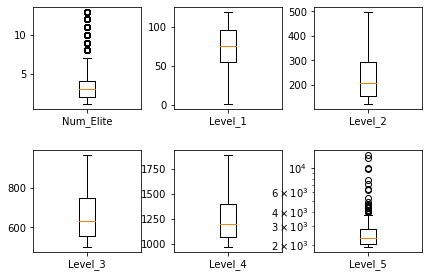

In [29]:
import matplotlib.pyplot as plt
# Detect Outliers
fig, axs = plt.subplots(2, 3)

user_outlier_1 = user_elite_2[(user_elite_2.Review_Level == 1)]
user_outlier_2 = user_elite_2[(user_elite_2.Review_Level == 2)]
user_outlier_3 = user_elite_2[(user_elite_2.Review_Level == 3)]
user_outlier_4 = user_elite_2[(user_elite_2.Review_Level == 4)]
user_outlier_5 = user_elite_2[(user_elite_2.Review_Level == 5)]
# basic plot
axs[0, 0].boxplot(user_elite_2['Num_Elite'])
axs[0, 0].set_xticklabels(['Num_Elite'])

axs[0, 1].boxplot(user_outlier_1['review_count'])
axs[0, 1].set_xticklabels(['Level_1'])


axs[0, 2].boxplot(user_outlier_2['review_count'])
axs[0, 2].set_xticklabels(['Level_2'])


axs[1, 0].boxplot(user_outlier_3['review_count'])
axs[1, 0].set_xticklabels(['Level_3'])


axs[1, 1].boxplot(user_outlier_4['review_count'])
axs[1, 1].set_xticklabels(['Level_4'])


axs[1, 2].boxplot(user_outlier_5['review_count'])
axs[1, 2].set_xticklabels(['Level_5'])
axs[1, 2].set_yscale('log')


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# Multiple box plots on one Axes
plt.show()


In [30]:
business_Q1_2.to_pickle('business_Question1.pickle')
business_Q2_2.to_pickle('business_Question2.pickle')
user_elite_2.to_pickle('user_Question3.pickle')

# 3. Data Visualization 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
%matplotlib inline
#Show plot in jupyter notebook
%matplotlib inline

In [32]:
dat1 = pd.read_pickle("business_Question1.pickle")
dat2 = pd.read_pickle("business_Question2.pickle")
dat3 = pd.read_pickle('user_Question3.pickle')

## 3.1 Data Visualization for What is the relationship between Busniess location and local catering industries?

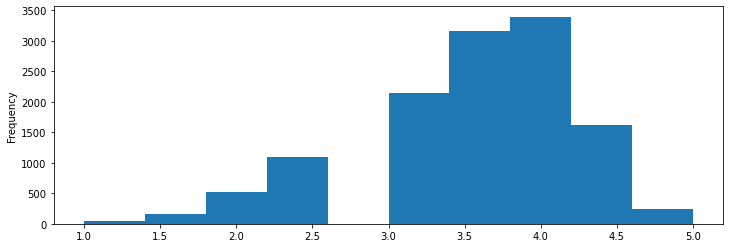

In [33]:
dat1['stars'].plot.hist(figsize=(12,4))

This hist plot shows the star frequency of the restaurants. Most restaurants have 3.5 or higher.

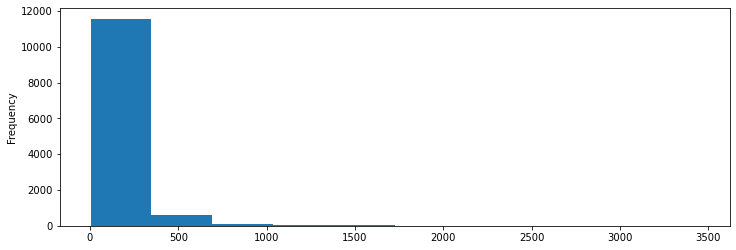

In [34]:
dat1['review_count'].plot.hist(figsize=(12,4))

From the hist plot, we can see that the majority of the restaurant have less than 500 reviews and a few restaurants have more than 1000 reviews

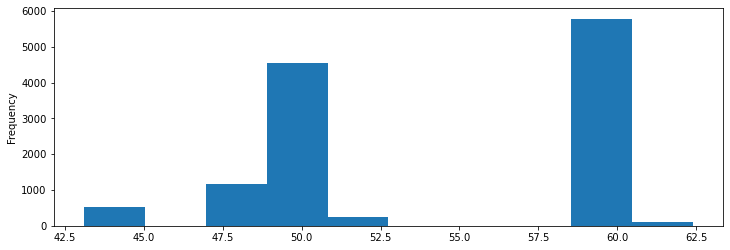

In [35]:
dat1['avg_F'].plot.hist(figsize=(12,4))

The range of average temperature is widely from 42.5 to 62.5. The most normal temperature is 60.

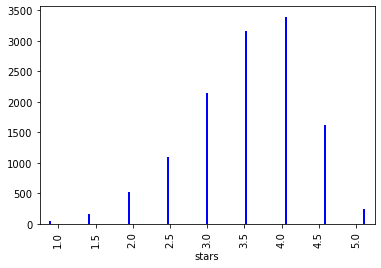

In [36]:
df1=dat1[['stars','review_count']]
df1 = df1[df1['stars']==1.0]
df1=df1.groupby('stars')['review_count'].count()
df2 = dat1[['stars','review_count']]
df2 = df2[df2['stars']==1.5]
df2 = df2.groupby(['stars'])['review_count'].count()
df3 = dat1[['stars','review_count']]
df3 = df3[df3['stars']==2.0]
df3 = df3.groupby(['stars'])['review_count'].count()
df4 = dat1[['stars','review_count']]
df4 = df4[df4['stars']==2.5]
df4 = df4.groupby(['stars'])['review_count'].count()
df5 = dat1[['stars','review_count']]
df5 = df5[df5['stars']==3.0]
df5 = df5.groupby(['stars'])['review_count'].count()
df6 = dat1[['stars','review_count']]
df6 = df6[df6['stars']==3.5]
df6 = df6.groupby(['stars'])['review_count'].count()
df7 = dat1[['stars','review_count']]
df7 = df7[df7['stars']==4.0]
df7 = df7.groupby(['stars'])['review_count'].count()
df8 = dat1[['stars','review_count']]
df8 = df8[df8['stars']==4.5]
df8 = df8.groupby(['stars'])['review_count'].count()
df9 = dat1[['stars','review_count']]
df9 = df9[df9['stars']==5.0]
df9 = df9.groupby(['stars'])['review_count'].count()
res=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=1)
res.reset_index(inplace=True)
res.plot(x="stars", y='review_count', kind="bar",color='b',legend=False)

From this bar plot, we can see that the most reviews are for stars 3.5-4.0

Populating the interactive namespace from numpy and matplotlib


c:\users\lhvpc\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

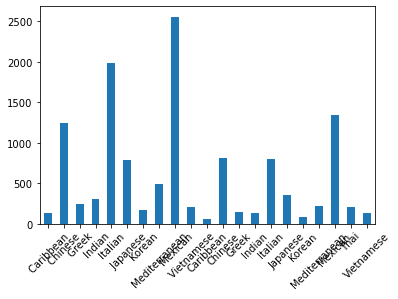

In [37]:
%pylab inline
#create a barchart
dat1['categories_countries'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)

From the plot, the number of the restaurant is vary. Mexican, Italian, and Chinese are the most accepted by people in a different area

## 3.2 Data Visualization for What factors impact on customer satisfaction for a specific restaurant?

In [38]:
dat2['WiFi'] = dat2['WiFi'].apply(lambda x: 0 if x == 'no'else 2 if x == 'free' else 1)
dat2['RestaurantsPriceRange2'] = dat2['RestaurantsPriceRange2'].apply(lambda x: 1 if x == '1'else 2 if x == '2' else 3 if x == '3' else 4)

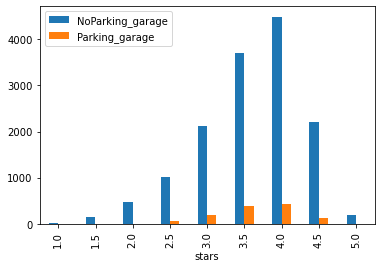

In [39]:
df2 = dat2[['stars','Parking_garage']]
df2 = df2[df2['Parking_garage']==0]
df2 = df2.groupby(['stars'])['Parking_garage'].count()
df3 = dat2[['stars','Parking_garage']]
df3 = df3[df3['Parking_garage']==1]
df3 = df3.groupby(['stars'])['Parking_garage'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NoParking_garage','Parking_garage']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NoParking_garage','Parking_garage'], kind="bar")

From the above bar chart, we can find that if a restaurant with a parking garage or not, it will not affect the evaluation of customers.

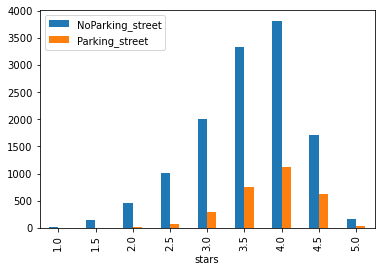

In [40]:
df2 = dat2[['stars','Parking_street']]
df2 = df2[df2['Parking_street']==0]
df2 = df2.groupby(['stars'])['Parking_street'].count()
df3 = dat2[['stars','Parking_street']]
df3 = df3[df3['Parking_street']==1]
df3 = df3.groupby(['stars'])['Parking_street'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NoParking_street','Parking_street']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NoParking_street','Parking_street'], kind="bar")

From the above bar chart, we can find that if a restaurant near the parking street or not, it will have small impact on evaluation of customers.

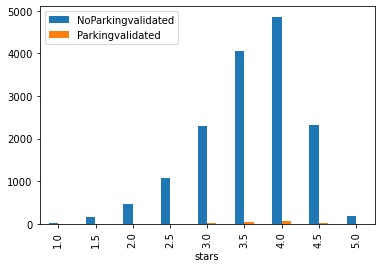

In [41]:
df2 = dat2[['stars','Parkingvalidated']]
df2 = df2[df2['Parkingvalidated']==0]
df2 = df2.groupby(['stars'])['Parkingvalidated'].count()
df3 = dat2[['stars','Parkingvalidated']]
df3 = df3[df3['Parkingvalidated']==1]
df3 = df3.groupby(['stars'])['Parkingvalidated'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NoParkingvalidated','Parkingvalidated']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NoParkingvalidated','Parkingvalidated'], kind="bar")

From the above bar chart, we can find that if a restaurant with a parking valet or not, it will not affect the evaluation of customers

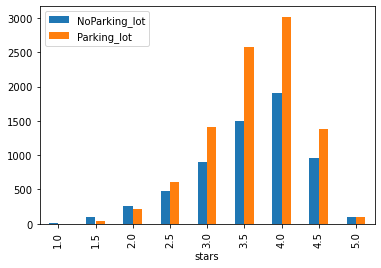

In [42]:
df2 = dat2[['stars','Parking_lot']]
df2 = df2[df2['Parking_lot']==0]
df2 = df2.groupby(['stars'])['Parking_lot'].count()
df3 = dat2[['stars','Parking_lot']]
df3 = df3[df3['Parking_lot']==1]
df3 = df3.groupby(['stars'])['Parking_lot'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NoParking_lot','Parking_lot']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NoParking_lot','Parking_lot'], kind="bar")

From the above bar chart, it can find that the high favorable comments of the restaurant are related to whether there is a parking lot. It can be seen from the figure that there is a parking lot that will more popular by customers than there is no parking lot.

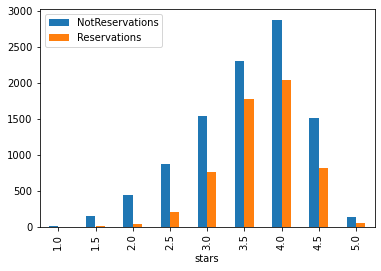

In [43]:
df2 = dat2[['stars','Reservations']]
df2 = df2[df2['Reservations']==0]
df2 = df2.groupby(['stars'])['Reservations'].count()
df3 = dat2[['stars','Reservations']]
df3 = df3[df3['Reservations']==1]
df3 = df3.groupby(['stars'])['Reservations'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NotReservations','Reservations']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NotReservations','Reservations'], kind="bar")

From the above bar chart, if a restaurant can make a reservation, it is possible to affect customers' evaluation of the restaurant. Although from the above bar chart, the restaurants that can't make an appointment also account for the majority and get good satisfaction from customers, there are also many restaurants that can be reserved, which are satisfied by customers. Therefore, we think that the restaurant reservation can improve customer satisfaction, but it is not the main factor affecting customer satisfaction.

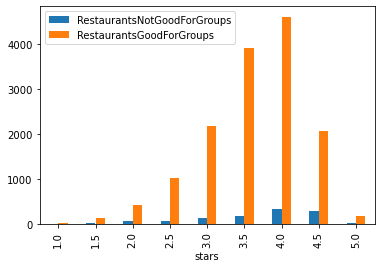

In [44]:
df2 = dat2[['stars','RestaurantsGoodForGroups']]
df2 = df2[df2['RestaurantsGoodForGroups']==0]
df2 = df2.groupby(['stars'])['RestaurantsGoodForGroups'].count()
df3 = dat2[['stars','RestaurantsGoodForGroups']]
df3 = df3[df3['RestaurantsGoodForGroups']==1]
df3 = df3.groupby(['stars'])['RestaurantsGoodForGroups'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['RestaurantsNotGoodForGroups','RestaurantsGoodForGroups']
res.reset_index(inplace=True)
res.plot(x="stars", y=['RestaurantsNotGoodForGroups','RestaurantsGoodForGroups'], kind="bar")

From the above bar chart, if a restaurant can make a discount, it will affect customers' evaluation of the restaurant.

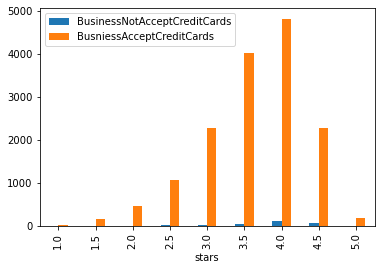

In [45]:
df0 = dat2[['stars','BusinessAcceptsCreditCards']]
df0 = df0[df0['BusinessAcceptsCreditCards']==0]
df0 = df0.groupby(['stars'])['BusinessAcceptsCreditCards'].count()
df1 = dat2[['stars','BusinessAcceptsCreditCards']]
df1 = df1[df1['BusinessAcceptsCreditCards']==1]
df1 = df1.groupby(['stars'])['BusinessAcceptsCreditCards'].count()
res=pd.concat([df0,df1],axis=1)
res.columns=['BusinessNotAcceptCreditCards','BusniessAcceptCreditCards']
res.reset_index(inplace=True)
res.plot(x="stars", y=['BusinessNotAcceptCreditCards','BusniessAcceptCreditCards'], kind="bar")

From the above bar chart, if a restaurant can accep credit cards, it will affect customers' evaluation of the restaurant. Because we all know, credit cart is very popular in America. So a restaurant if only accept cash, will lose many customers.

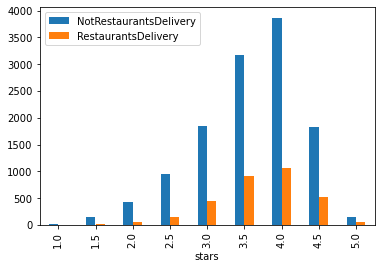

In [46]:
df2 = dat2[['stars','RestaurantsDelivery']]
df2 = df2[df2['RestaurantsDelivery']==0]
df2 = df2.groupby(['stars'])['RestaurantsDelivery'].count()
df3 = dat2[['stars','RestaurantsDelivery']]
df3 = df3[df3['RestaurantsDelivery']==1]
df3 = df3.groupby(['stars'])['RestaurantsDelivery'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['NotRestaurantsDelivery','RestaurantsDelivery']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NotRestaurantsDelivery','RestaurantsDelivery'], kind="bar")

From the above bar chart, we can find that if a restaurant can delivery or not, it will have small impact on evaluation of customers.

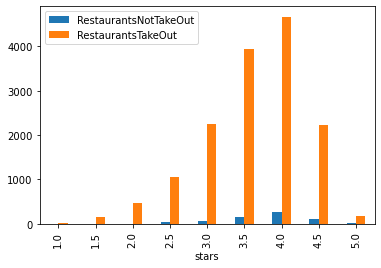

In [47]:
df2 = dat2[['stars','RestaurantsTakeOut']]
df2 = df2[df2['RestaurantsTakeOut']==0]
df2 = df2.groupby(['stars'])['RestaurantsTakeOut'].count()
df3 = dat2[['stars','RestaurantsTakeOut']]
df3 = df3[df3['RestaurantsTakeOut']==1]
df3 = df3.groupby(['stars'])['RestaurantsTakeOut'].count()
res=pd.concat([df2,df3],axis=1)
res.columns=['RestaurantsNotTakeOut','RestaurantsTakeOut']
res.reset_index(inplace=True)
res.plot(x="stars", y=['RestaurantsNotTakeOut','RestaurantsTakeOut'], kind="bar")

From the above bar chart, if a restaurant can take out, it will improve customer satisfaction.

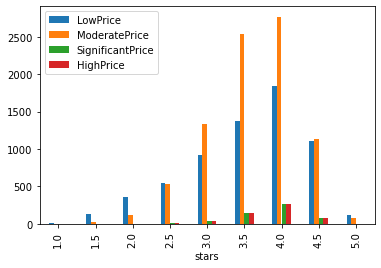

In [48]:
df2 = dat2[['stars','RestaurantsPriceRange2']]
df2 = df2[df2['RestaurantsPriceRange2']==1]
df2 = df2.groupby(['stars'])['RestaurantsPriceRange2'].count()
df3 = dat2[['stars','RestaurantsPriceRange2']]
df3 = df3[df3['RestaurantsPriceRange2']==2]
df3 = df3.groupby(['stars'])['RestaurantsPriceRange2'].count()
df4 = dat2[['stars','RestaurantsPriceRange2']]
df4 = df4[df4['RestaurantsPriceRange2']==3]
df4 = df4.groupby(['stars'])['RestaurantsPriceRange2'].count()
df5 = dat2[['stars','RestaurantsPriceRange2']]
df5 = df5[df5['RestaurantsPriceRange2']==3]
df5 = df5.groupby(['stars'])['RestaurantsPriceRange2'].count()
res=pd.concat([df2,df3,df4,df5],axis=1)
res.columns=['LowPrice','ModeratePrice','SignificantPrice','HighPrice']
res.reset_index(inplace=True)
res.plot(x="stars", y=['LowPrice','ModeratePrice','SignificantPrice','HighPrice'], kind="bar")

From the above bar chart, most customers accept a moderate price. These groups will give 3.5 to 4 stars for the restaurant. The restaurant at a low price also can attractive to customers. Because there are still many restaurants at low prices but get more than 4 stars for customers. (By default, restaurants with more than 4 stars are more popular with customers) The restaurant with a higher price is mainly concentrated in four-star restaurants but just a few restaurants. We believe that the appropriate price can better improve customer satisfaction.

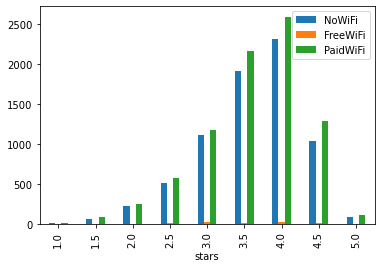

In [49]:
df2 = dat2[['stars','WiFi']]
df2 = df2[df2['WiFi']==0]
df2 = df2.groupby(['stars'])['WiFi'].count()
df3 = dat2[['stars','WiFi']]
df3 = df3[df3['WiFi']==1]
df3 = df3.groupby(['stars'])['WiFi'].count()
df4 = dat2[['stars','WiFi']]
df4 = df4[df4['WiFi']==2]
df4 = df4.groupby(['stars'])['WiFi'].count()
res=pd.concat([df2,df3,df4],axis=1)
res.columns=['NoWiFi','FreeWiFi','PaidWiFi']
res.reset_index(inplace=True)
res.plot(x="stars", y=['NoWiFi','FreeWiFi','PaidWiFi'], kind="bar")

From the above bar chart, most customers accept there are no WiFi or Paid WiFi.

## 3.3 Data Visualization for What is the most important characteristic of elite users?

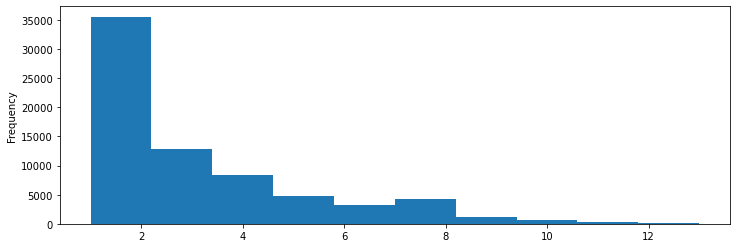

In [50]:
dat3['Num_Elite'].plot.hist(figsize=(12,4))

This hist plot shows the star frequency of the elite year. Most users have 2 year or less.

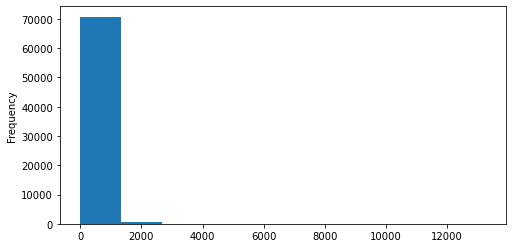

In [51]:
dat3['review_count'].plot.hist(figsize=(8,4))

From the hist plot, we can see that the majority of the users have less than 1000 reviews.

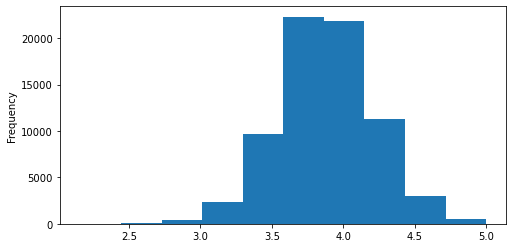

In [52]:
dat3['average_stars'].plot.hist(figsize=(8,4))

The range of the average star is from 2.5 to 5. The most normal stars are 4 and 4.5.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

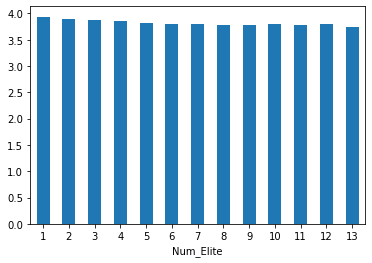

In [53]:
df2 = dat3[['average_stars','Num_Elite']]
df2 = df2.groupby(['Num_Elite'])['average_stars'].mean()
df2.plot(x='Num_Elite',y='average_stars',kind='bar')
plt.xticks(rotation = 0)

We can see that the average stars don't have much effect on number of years the user has been assigned as elite user.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

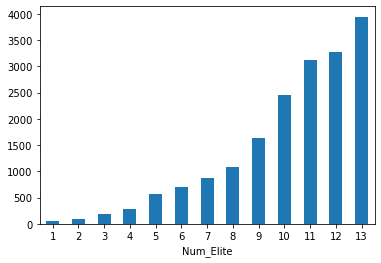

In [54]:
df2 = dat3[['Total_compliment','Num_Elite']]
df2 = df2.groupby(['Num_Elite'])['Total_compliment'].mean()
df2.plot(x='Num_Elite',y='Total_compliment',kind='bar')
plt.xticks(rotation = 0)

In [55]:
dat3_bar = dat3
dat3_bar['Elite_Level'] = dat3['Num_Elite'].apply(lambda x: 3 if x>7 else (2 if x> 2 else 1 ))

dat3_1 = dat3_bar[dat3_bar.Elite_Level == 1]
dat3_2 = dat3_bar[dat3_bar.Elite_Level == 2]
dat3_3 = dat3_bar[dat3_bar.Elite_Level == 3]

dat3_1= dat3_1[['Review_Level','Elite_Level']].groupby('Review_Level').count()
dat3_2= dat3_2[['Review_Level','Elite_Level']].groupby('Review_Level').count()
dat3_3= dat3_3[['Review_Level','Elite_Level']].groupby('Review_Level').count()

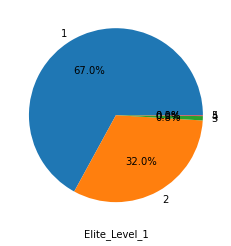

In [56]:
dat3_1['Elite_Level'].plot(kind='pie',autopct='%.1f%%',fontsize=10, figsize=(4,4))
plt.xlabel('Elite_Level_1')
plt.ylabel('')
plt.show()

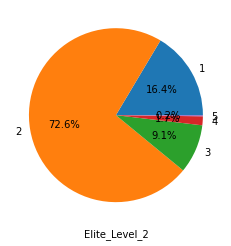

In [57]:
dat3_2['Elite_Level'].plot(kind='pie',autopct='%.1f%%',fontsize=10, figsize=(4,4))
plt.xlabel('Elite_Level_2')
plt.ylabel('')
plt.show()

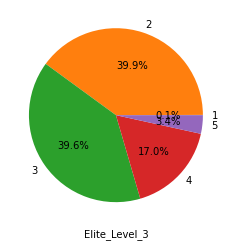

In [58]:
dat3_3['Elite_Level'].plot(kind='pie',autopct='%.1f%%',fontsize=10, figsize=(4,4))
plt.xlabel('Elite_Level_3')
plt.ylabel('')
plt.show()

# 4. Corrleation Analysis and PCA analysis

## 4.1 What is the relationship between Busniess location and local catering industries

### 4.1.1 Corrleation analysis

In [59]:
dat1.corr()

,latitude,longitude,stars,review_count,is_open,avg_F,avg_C,rank
latitude,1.000000,0.688744,-0.030892,-0.127545,0.042905,-0.820812,-0.817507,0.817212
longitude,0.688744,1.000000,-0.050483,-0.215037,0.084709,-0.256411,-0.251696,0.264523
stars,-0.030892,-0.050483,1.000000,0.192398,0.049649,-0.002977,-0.003411,0.002052
review_count,-0.127545,-0.215037,0.192398,1.000000,0.197288,-0.009114,-0.010504,0.006301
is_open,0.042905,0.084709,0.049649,0.197288,1.000000,0.008718,0.009188,-0.009342
avg_F,-0.820812,-0.256411,-0.002977,-0.009114,0.008718,1.000000,0.999975,-0.996833
avg_C,-0.817507,-0.251696,-0.003411,-0.010504,0.009188,0.999975,1.000000,-0.996601
rank,0.817212,0.264523,0.002052,0.006301,-0.009342,-0.996833,-0.996601,1.000000


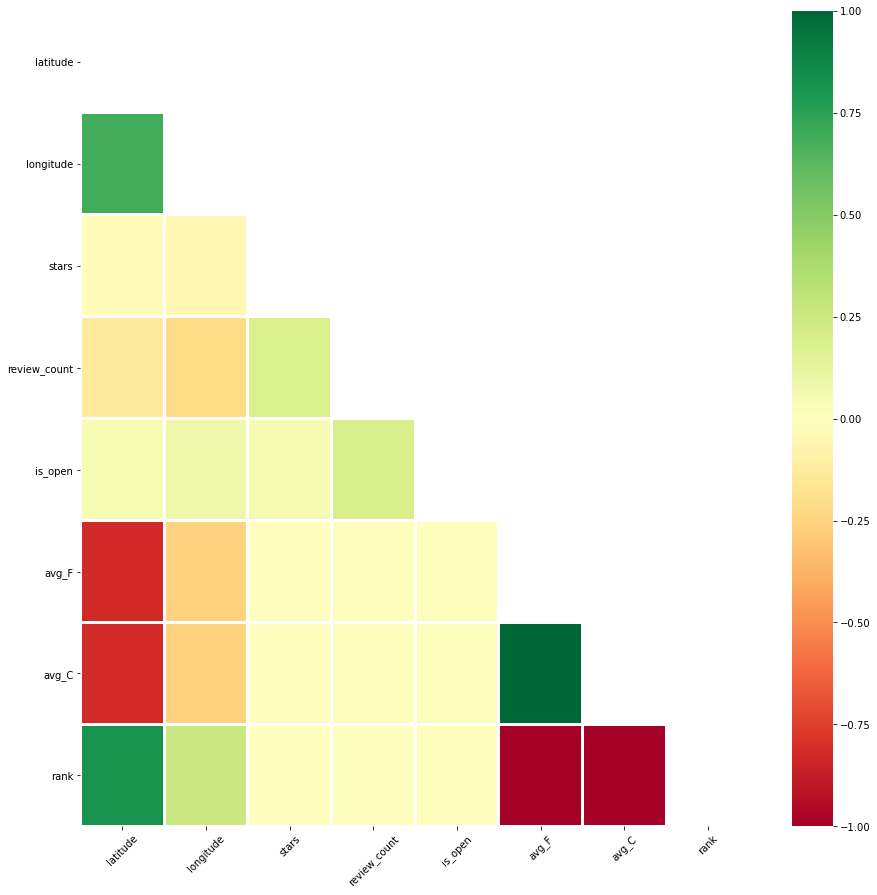

In [60]:
mask = np.zeros_like(dat1.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(dat1.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig('correlation_heatmap.png',dpi=500,bbox_inches='tight')

We mainly want to find relationship between busniess location and local catering industries. We think that the higher the star rating, the more popular the restaurant is. Through the correlation analysis and heat map analysis, we know that the restaurant's stars have a negative correlation with latitude and longitude. This means that restaurants with high latitude and longitude are less popular.

### 4.1.2 PCA analysis

In [61]:
df = pd.read_pickle('business_Question1.pickle')
df = df.reset_index()
stars = df['stars']
df = df.drop (['categories','state_name','stars'], axis=1)
df = df.reset_index()

In [62]:
data_norm = scale(df.loc[:,'latitude':'rank'])
pd.DataFrame(data_norm).describe()

,0,1,2,3,4,5,6
count,1.239400e+04,1.239400e+04,1.239400e+04,1.239400e+04,1.239400e+04,1.239400e+04,1.239400e+04
mean,-1.316287e-15,-1.367310e-15,1.719887e-17,-8.370118e-17,1.914808e-15,1.169523e-16,7.108867e-17
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-1.041054e+00,-9.418721e-01,-5.322235e-01,-1.463726e+00,-2.058936e+00,-2.041649e+00,-1.259512e+00
25%,-9.308846e-01,-7.484464e-01,-4.749117e-01,-1.463726e+00,-8.268136e-01,-8.350115e-01,-1.053686e+00
50%,-1.513892e-01,-7.188571e-01,-3.290272e-01,6.831878e-01,-6.818580e-01,-6.719524e-01,5.929262e-01
75%,1.213717e+00,1.251112e+00,5.131468e-02,6.831878e-01,1.057609e+00,1.056474e+00,7.987527e-01
max,2.678861e+00,1.777871e+00,1.742200e+01,6.831878e-01,1.438118e+00,1.447816e+00,2.342452e+00


In [63]:
# Select the number of components
pca1 = PCA(n_components=7)

# Fit the PCA model
pca1.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

print(var)

[5.58944393e-01 1.81124814e-01 1.57409562e-01 9.35184171e-02
 8.44228192e-03 5.60002904e-04 5.29012291e-07]


In [65]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[55.89 74.   89.74 99.09 99.93 99.99 99.99]


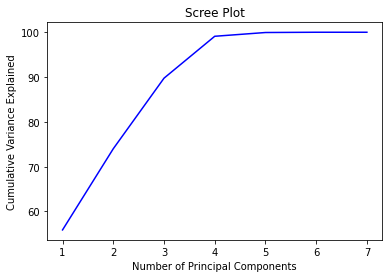

In [66]:
var1 = pd.DataFrame(var1, index=np.arange(1,8))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

3 components we need to keep in order to keep 90% variance of the original predictors.

In [67]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,-1.073713,-0.418580
1,-2.155127,-0.059729
2,2.054425,-0.697445
3,0.916597,0.074010
4,0.922268,1.374082


In [68]:
pd.DataFrame(pca2.components_.transpose(),
             index=df.loc[:,'latitude':'rank'].columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
latitude,0.471435,-0.167664
longitude,0.243877,-0.483336
review_count,-0.033814,0.740463
is_open,0.007173,0.350434
avg_F,-0.489256,-0.150270
avg_C,-0.488522,-0.153159
rank,0.488930,0.145418


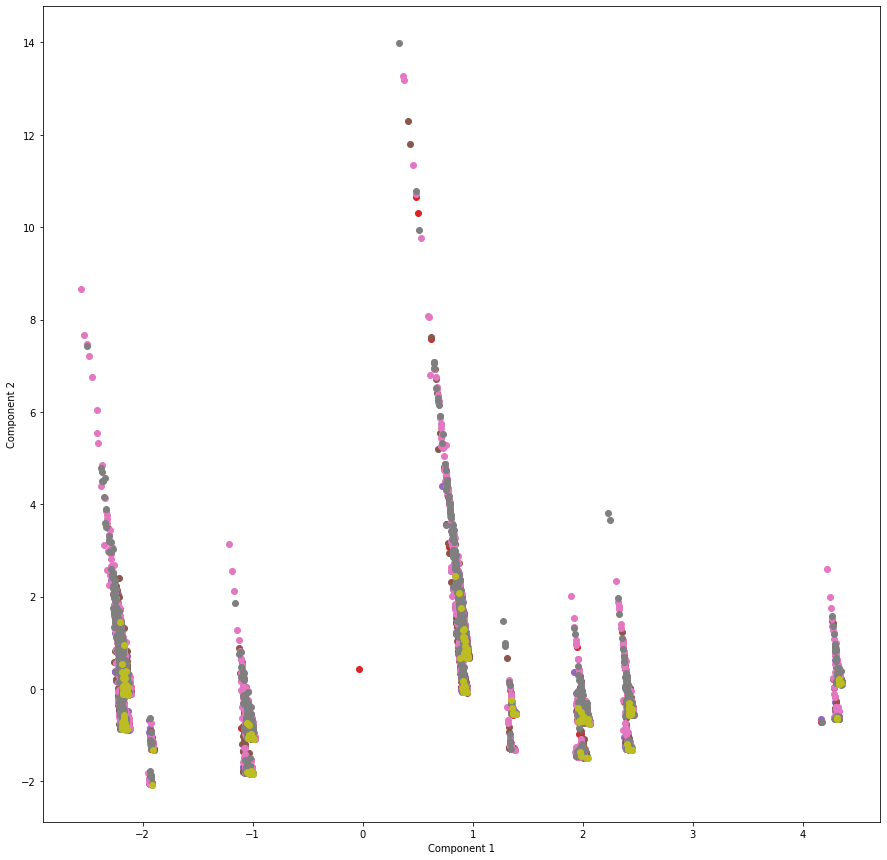

In [69]:
fig, ax = plt.subplots(figsize=(15,15))


idx = df[stars == 1].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:blue')
idx = df[stars == 1.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:orange')
idx = df[stars == 2].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:green')
idx = df[stars == 2.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:red')
idx = df[stars == 3].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:purple')
idx = df[stars == 3.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:brown')
idx = df[stars == 4].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:pink')
idx = df[stars == 4.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:gray')
idx = df[stars == 5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:olive')


plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('2D_plot.png', dpi=300,bbox_inches='tight')

According to the scatter plot shown above, these two principal components are not good predictors for evaluate a restaurant star. Because we can't find that these two principal components evaluate a restaurant star seperately.

## 4.2 What factors impact on customer satisfaction for a specific restaurant?

### 4.2.1 Corrleation analysis

In [70]:
dat2.corr(method='pearson')

,stars,Reservations,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Parking_garage,Parking_street,...,GFM_dinner,GFM_brunch,GFM_breakfast,Cal_Hours_Mo,Cal_Hours_Tu,Cal_Hours_Wn,Cal_Hours_Th,Cal_Hours_Fr,Cal_Hours_Sa,Cal_Hours_Su
stars,1.000000,0.118096,-0.026965,-0.049890,0.063732,0.093293,-0.049145,0.010664,0.012623,0.157082,...,0.118930,0.043524,-0.046608,-0.244110,-0.112711,-0.104553,-0.093708,-0.086731,-0.100448,-0.218189
Reservations,0.118096,1.000000,0.144926,0.069125,0.018756,0.506098,-0.144183,0.123656,0.121390,0.073116,...,0.261808,-0.074692,-0.202929,-0.124361,-0.106188,-0.100646,-0.095983,-0.053839,-0.019187,-0.021936
RestaurantsGoodForGroups,-0.026965,0.144926,1.000000,0.093614,-0.054781,0.115846,-0.011773,0.110171,0.021521,-0.056126,...,0.141473,0.024069,-0.031818,0.009412,0.002097,-0.003306,-0.001259,0.003088,0.029029,0.067271
BusinessAcceptsCreditCards,-0.049890,0.069125,0.093614,1.000000,0.044623,0.072904,0.023583,0.083979,0.031061,-0.076477,...,0.037574,-0.007176,-0.029665,0.015716,0.022798,0.013921,0.014081,0.018424,0.018818,0.037707
RestaurantsDelivery,0.063732,0.018756,-0.054781,0.044623,1.000000,-0.060163,0.096425,0.015891,-0.042107,0.022960,...,0.005388,-0.048664,-0.084019,-0.010143,0.026690,0.029974,0.029027,0.032172,0.013039,-0.009338
RestaurantsPriceRange2,0.093293,0.506098,0.115846,0.072904,-0.060163,1.000000,-0.303244,0.123630,0.204261,0.066848,...,0.272096,-0.059889,-0.190368,-0.133840,-0.134502,-0.130260,-0.130392,-0.081488,-0.038116,-0.015168
RestaurantsTakeOut,-0.049145,-0.144183,-0.011773,0.023583,0.096425,-0.303244,1.000000,0.015159,-0.169097,-0.035474,...,-0.031950,0.009503,0.041538,0.094333,0.134987,0.130465,0.128926,0.114667,0.095312,0.080036
WiFi,0.010664,0.123656,0.110171,0.083979,0.015891,0.123630,0.015159,1.000000,0.077662,0.080076,...,-0.054567,0.100967,0.095868,-0.033216,0.035709,0.030209,0.036064,0.044108,0.039156,0.032635
Parking_garage,0.012623,0.121390,0.021521,0.031061,-0.042107,0.204261,-0.169097,0.077662,1.000000,0.096745,...,0.038740,0.024469,0.002634,-0.009734,-0.024128,-0.023706,-0.021261,-0.003189,-0.004036,0.017658
Parking_street,0.157082,0.073116,-0.056126,-0.076477,0.022960,0.066848,-0.035474,0.080076,0.096745,1.000000,...,0.022593,0.007487,-0.028323,-0.092872,-0.026821,-0.018096,-0.010438,0.008350,-0.004310,-0.059628


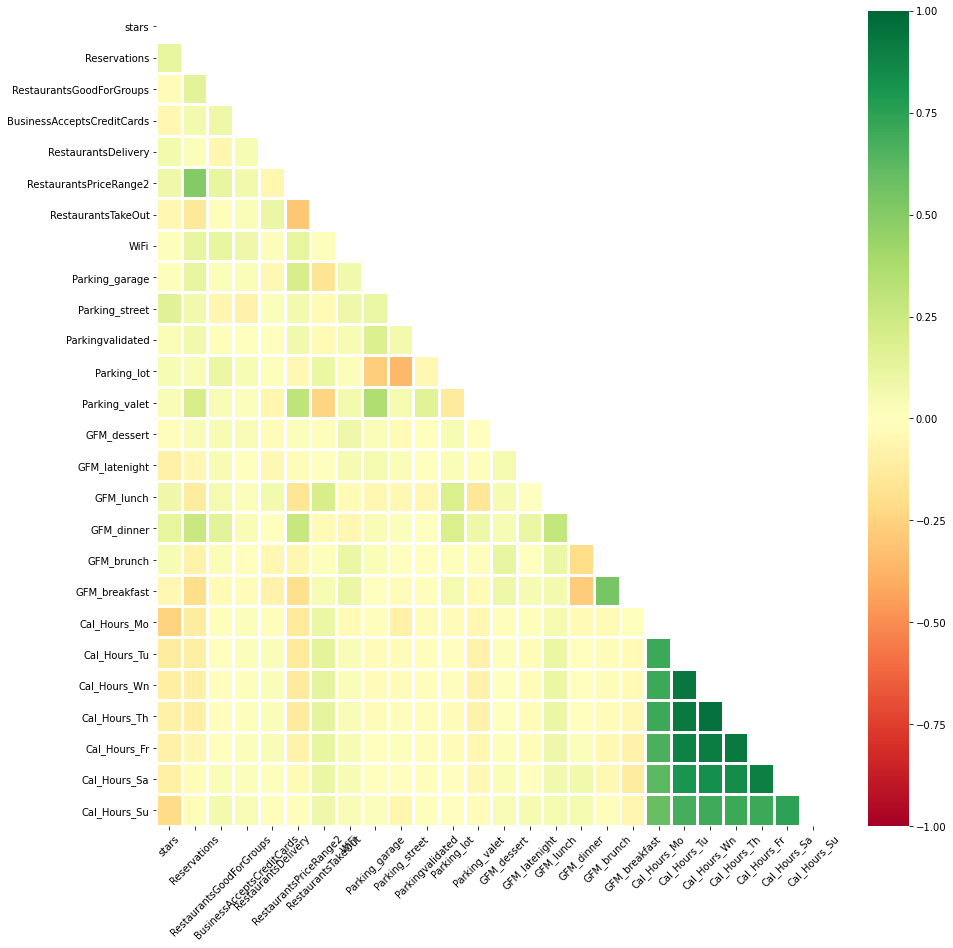

In [71]:
mask = np.zeros_like(dat2.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(dat2.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=45)


# Save the correlation heatmap as a file, set the quality of the figure as dpi=500
plt.savefig('correlation_heatmap.png',dpi=500,bbox_inches='tight')

This heatmap shows the relationship between the stars and other variables is weak, which means that we are hard to define the facts for the stars. We can conclude that reservation, parking_street and GFM_dinner have relatively strong positive relationship with stars, while calculation of opening hours, businessAcceptCreditCards and GFM_breakfast have slightly negative relationship with stars.

### 4.2.2 PCA analysis

In [72]:
df2 = pd.read_pickle('business_Question2.pickle')
df2 = df2.reset_index()
stars2 = df2['stars']
df2 = df2.drop (['index','business_id', 'name','stars', 'attributes', 'categories'], axis=1)
df2 = df2.drop(['Hours_Mo','Hours_Tu','Hours_Wn','Hours_Th','Hours_Fr','Hours_Sa','Hours_Su'],axis=1)
df2 = df2.drop(['Parkingvalidated', 'GFM_breakfast', 'Reservations', 'Cal_Hours_Wn', 'Cal_Hours_Sa'],axis=1)
df2 = df2.drop(['Cal_Hours_Th', 'Cal_Hours_Fr', 'BusinessAcceptsCreditCards', 'Cal_Hours_Tu', 'RestaurantsTakeOut',
                'RestaurantsGoodForGroups','RestaurantsPriceRange2','Cal_Hours_Su'],axis=1)
df2['WiFi'] = df2['WiFi'].apply(lambda x: 0 if x == 'no'else 2 if x == 'free' else 1)

In [73]:
data_norm2 = scale(df2.loc[:,'RestaurantsDelivery':'Cal_Hours_Mo'])
pd.DataFrame(data_norm2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.506118,-1.069031,-0.291809,-0.478408,0.815295,-0.219142,-0.33559,-0.311093,0.660670,0.802249,-0.422939,-0.790186
1,-0.506118,-1.069031,-0.291809,-0.478408,0.815295,-0.219142,-0.33559,-0.311093,0.660670,0.802249,-0.422939,0.286067
2,-0.506118,0.941135,-0.291809,2.090268,-1.226551,-0.219142,-0.33559,-0.311093,-1.513616,0.802249,-0.422939,-1.507688
3,-0.506118,-1.069031,-0.291809,2.090268,-1.226551,-0.219142,-0.33559,-0.311093,0.660670,-1.246495,-0.422939,0.106692
4,-0.506118,-1.069031,-0.291809,-0.478408,-1.226551,-0.219142,-0.33559,-0.311093,-1.513616,-1.246495,-0.422939,-1.507688
...,...,...,...,...,...,...,...,...,...,...,...,...
15555,-0.506118,0.941135,-0.291809,-0.478408,-1.226551,-0.219142,-0.33559,-0.311093,0.660670,0.802249,-0.422939,0.555130
15556,1.975823,-1.069031,-0.291809,2.090268,0.815295,-0.219142,-0.33559,-0.311093,0.660670,-1.246495,-0.422939,-1.507688
15557,-0.506118,0.941135,-0.291809,-0.478408,0.815295,-0.219142,-0.33559,-0.311093,-1.513616,-1.246495,-0.422939,-1.507688
15558,-0.506118,-1.069031,-0.291809,-0.478408,-1.226551,-0.219142,-0.33559,-0.311093,0.660670,0.802249,-0.422939,0.286067


In [74]:
# Select the number of components
pca1 = PCA(n_components=12)

# Fit the PCA model
pca1.fit(data_norm2)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
#The amount of variance that each PC explains
var1 = pca1.explained_variance_ratio_

print(var1)


[0.14672535 0.11388768 0.10555466 0.09389467 0.08626905 0.08427592
 0.08112953 0.07451647 0.07200866 0.05613186 0.04424287 0.04136328]


In [76]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 14.67  26.06  36.62  46.01  54.64  63.07  71.18  78.63  85.83  91.44
  95.86 100.  ]


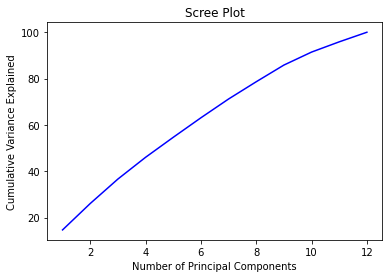

In [77]:
var1 = pd.DataFrame(var1, index=np.arange(1,13))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

11 number of components we need to keep in order to keep 90% variance of the original predictors.

In [78]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm2)
data_pca2 = pca2.fit_transform(data_norm2)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,-1.277935,0.613678
1,-1.372619,0.532753
2,1.907705,-0.138356
3,1.110232,-0.991019
4,1.050139,-1.748184


In [79]:
pd.DataFrame(pca2.components_.transpose(),
             index=df2.loc[:,'RestaurantsDelivery':'Cal_Hours_Mo'].columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
RestaurantsDelivery,-0.085654,-0.030852
WiFi,0.144570,0.060778
Parking_garage,0.454919,0.347628
Parking_street,0.377578,0.046006
Parking_lot,-0.535926,0.140048
Parking_valet,0.401335,0.359620
GFM_dessert,-0.037640,0.174083
GFM_latenight,0.016066,0.295290
GFM_lunch,-0.353107,0.349714
GFM_dinner,-0.196666,0.668448


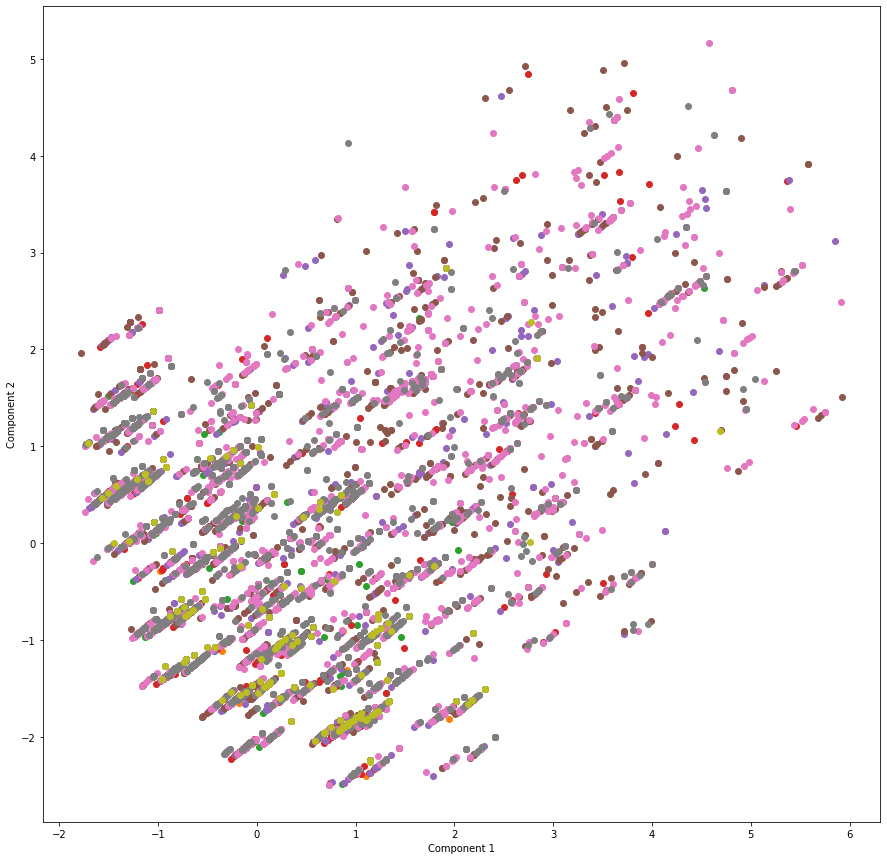

In [80]:
fig, ax = plt.subplots(figsize=(15,15))
#ax.scatter(data_pca2['PC1'], data_pca2['PC2'])

idx = df2[stars2 == 1].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:blue')
idx = df2[stars2 == 1.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:orange')
idx = df2[stars2 == 2].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:green')
idx = df2[stars2 == 2.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:red')
idx = df2[stars2 == 3].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:purple')
idx = df2[stars2 == 3.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:brown')
idx = df2[stars2 == 4].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:pink')
idx = df2[stars2 == 4.5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:gray')
idx = df2[stars2 == 5].index
ax.scatter(data_pca2.loc[idx,'PC1'], data_pca2.loc[idx,'PC2'],c='tab:olive')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('2D_plot.png', dpi=300,bbox_inches='tight')

According to the scatter plot shown above, these two principal components are not good predictors for evaluate a restaurant star. Because we hardly to find that these two principal components evaluate a restaurant star seperately.

## 4.3 What is the most important characteristic of elite users?

### 4.3.1 Corrleation Analysis

In [81]:
dat3.corr(method='pearson')

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Num_Friends,Num_Elite,Total_compliment,Review_Level,Elite_Level
review_count,1.000000,0.597869,0.487263,0.517207,0.516385,-0.126134,0.264843,0.282068,0.189529,0.226299,...,0.330325,0.330354,0.330354,0.351835,0.160413,0.464447,0.593043,0.330386,0.786865,0.495882
useful,0.597869,1.000000,0.966708,0.990471,0.682067,-0.037508,0.635548,0.694517,0.544828,0.513890,...,0.728486,0.779437,0.779437,0.794286,0.620035,0.597305,0.313969,0.764610,0.428452,0.257152
funny,0.487263,0.966708,1.000000,0.980082,0.624290,-0.029803,0.666966,0.739205,0.585462,0.557704,...,0.735899,0.807255,0.807255,0.828759,0.663779,0.529991,0.247454,0.789613,0.340250,0.200871
cool,0.517207,0.990471,0.980082,1.000000,0.643083,-0.012928,0.659562,0.718394,0.570653,0.533706,...,0.736823,0.803733,0.803733,0.811421,0.653247,0.562001,0.254966,0.784781,0.362161,0.207889
fans,0.516385,0.682067,0.624290,0.643083,1.000000,-0.014382,0.456458,0.411591,0.300483,0.414875,...,0.550756,0.526460,0.526460,0.509087,0.346746,0.682709,0.325207,0.533538,0.401854,0.265872
average_stars,-0.126134,-0.037508,-0.029803,-0.012928,-0.014382,1.000000,-0.004037,-0.020356,-0.005997,-0.013285,...,-0.001384,-0.006401,-0.006401,-0.015008,0.004153,0.018148,-0.132407,-0.007215,-0.158876,-0.123110
compliment_hot,0.264843,0.635548,0.666966,0.659562,0.456458,-0.004037,1.000000,0.728727,0.659551,0.717537,...,0.694938,0.872000,0.872000,0.774775,0.732554,0.353744,0.175518,0.911216,0.206533,0.138960
compliment_more,0.282068,0.694517,0.739205,0.718394,0.411591,-0.020356,0.728727,1.000000,0.938682,0.788516,...,0.780370,0.849973,0.849973,0.902238,0.772554,0.329659,0.176783,0.862734,0.214273,0.141061
compliment_profile,0.189529,0.544828,0.585462,0.570653,0.300483,-0.005997,0.659551,0.938682,1.000000,0.796178,...,0.709608,0.767376,0.767376,0.817990,0.750195,0.230173,0.117919,0.785940,0.142800,0.093589
compliment_cute,0.226299,0.513890,0.557704,0.533706,0.414875,-0.013285,0.717537,0.788516,0.796178,1.000000,...,0.658699,0.736992,0.736992,0.705211,0.632353,0.310039,0.158565,0.753633,0.182630,0.124374


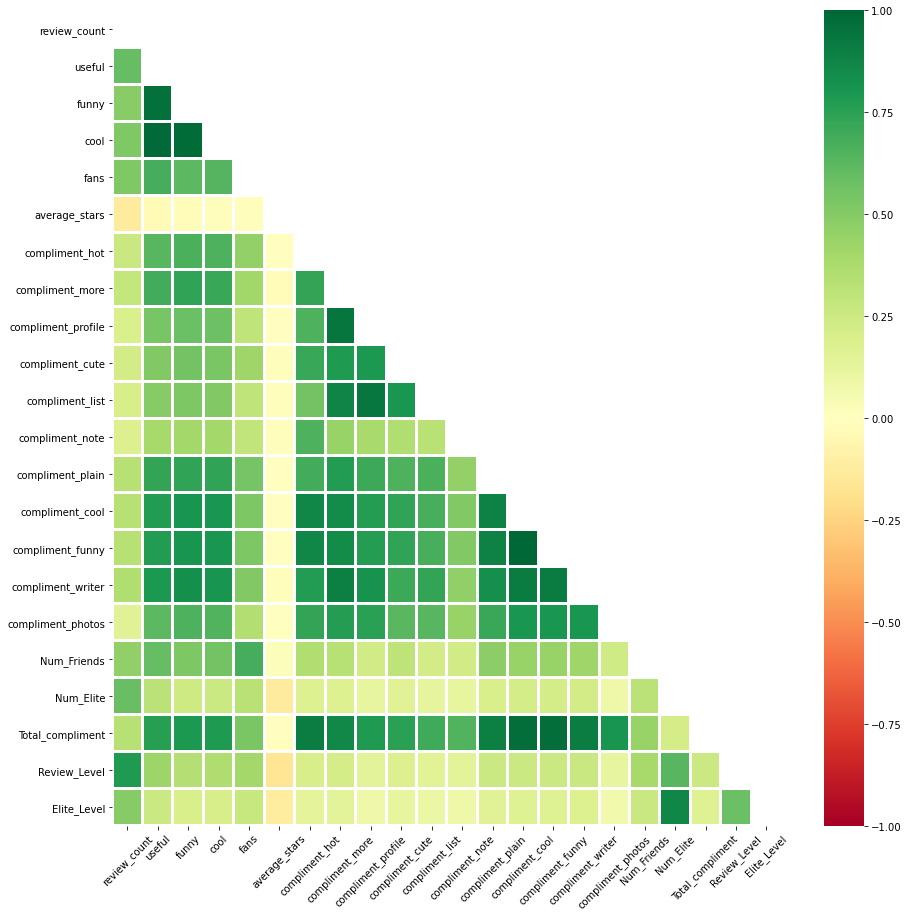

In [82]:
mask = np.zeros_like(dat3.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(dat3.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=45)


# Save the correlation heatmap as a file, set the quality of the figure as dpi=500
plt.savefig('correlation_heatmap.png',dpi=500,bbox_inches='tight')

# 5. Regression analysis

## 5.1 What factors impact on customer satisfaction for a specific restaurant?

In [83]:
import statsmodels.api as sm
import seaborn as sb
from sklearn import model_selection

In [84]:
dat = dat1.drop(['name','state','city','categories','is_open','avg_C','rank','state_name','review_count'],axis=1)
dat.categories_countries = dat.categories_countries.apply(lambda x: x.replace(" ",""))
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12394 entries, 1 to 59386
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              12394 non-null  float64
 1   longitude             12394 non-null  float64
 2   stars                 12394 non-null  float64
 3   avg_F                 12394 non-null  float64
 4   categories_countries  12394 non-null  object 
dtypes: float64(4), object(1)
memory usage: 581.0+ KB


In [85]:
dat['is_good'] = 1
dat.is_good = dat.stars.apply(lambda x: 1 if x > 3.5 else 0)
dat = dat.drop(['stars'],axis=1)
pd.crosstab(dat.is_good, columns='count')/pd.crosstab(dat.is_good, columns='count').sum()

col_0,count
is_good,
0,0.574472
1,0.425528


In [86]:
dat['categories_countries'].value_counts()

Mexican          3901
Italian          2784
Chinese          2061
Japanese         1135
Mediterranean     711
Indian            430
Greek             381
Vietnamese        338
Korean            252
Thai              212
Caribbean         189
Name: categories_countries, dtype: int64

Populating the interactive namespace from numpy and matplotlib


c:\users\lhvpc\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

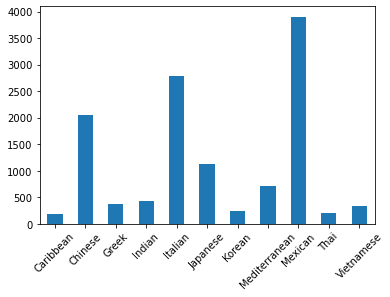

In [87]:
%pylab inline
#create a barchart
dat['categories_countries'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)

In [88]:
y = dat['is_good']
X = pd.concat([dat.drop(['is_good'],axis=1), pd.get_dummies(dat['categories_countries'])], axis=1)
X = X.drop(['categories_countries','Caribbean'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12394 entries, 1 to 59386
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12394 non-null  float64
 1   longitude      12394 non-null  float64
 2   avg_F          12394 non-null  float64
 3   Chinese        12394 non-null  uint8  
 4   Greek          12394 non-null  uint8  
 5   Indian         12394 non-null  uint8  
 6   Italian        12394 non-null  uint8  
 7   Japanese       12394 non-null  uint8  
 8   Korean         12394 non-null  uint8  
 9   Mediterranean  12394 non-null  uint8  
 10  Mexican        12394 non-null  uint8  
 11  Thai           12394 non-null  uint8  
 12  Vietnamese     12394 non-null  uint8  
dtypes: float64(3), uint8(10)
memory usage: 508.3 KB


In [89]:
# Describe the logistic model
mod = sm.Logit(y,sm.add_constant(X))

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

Optimization terminated successfully.
         Current function value: 0.658144
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                12394
Model:                          Logit   Df Residuals:                    12380
Method:                           MLE   Df Model:                           13
Date:                Mon, 04 May 2020   Pseudo R-squ.:                 0.03500
Time:                        03:10:15   Log-Likelihood:                -8157.0
converged:                       True   LL-Null:                       -8452.9
Covariance Type:            nonrobust   LLR p-value:                4.518e-118
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1332      1.447     -0.783      0.433      -3.969       1.702
latitude          0.0196      0.021      0.942      0.346      -0.021       0.060
longitude        -0.0087      0.003     -3.446      0.001      -0.014      -0.004
avg_F             0.0053      0.009      0.591      0.554      -0.012       0.023
Chinese          -1.6647      0.163    -10.222      0.000      -1.984      -1.345
Greek            -0.5025      0.186     -2.696      0.007      -0.868      -0.137
Indian           -0.7092      0.183     -3.879      0.000      -1.067      -0.351
Italian          -1.1130      0.160     -6.954      0.000      -1.427      -0.799
Japanese         -0.7868      0.166     -4.728      0.000      -1.113      -0.461
Korean           -0.5089      0.201     -2.528      0.011      -0.903      -0.114
Mediterranean    -0.0443      0.175     -0.254      0.800      -0.386       0.298
Mexican          -1.2451      0.159     -7.831      0.000      -1.557      -0.933
Thai             -0.5187      0.208     -2.493      0.013      -0.927      -0.111
Vietnamese       -0.3070      0.191     -1.604      0.109      -0.682       0.068
=================================================================================
"""

In [90]:
# Calculate average marginal effects
mfx = fit.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                is_good
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
latitude          0.0046      0.005      0.942      0.346      -0.005       0.014
longitude        -0.0020      0.001     -3.452      0.001      -0.003      -0.001
avg_F             0.0012      0.002      0.591      0.554      -0.003       0.005
Chinese          -0.3877      0.037    -10.389      0.000      -0.461      -0.315
Greek            -0.1170      0.043     -2.699      0.007      -0.202      -0.032
Indian           -0.1652      0.042     -3.888      0.000      -0.248      -0.082
Italian          -0.2592      0.037     -7.008      0.000      -0.332      -0.187
Japanese         -0.1832      0.039     -4.744      0.000      -0.259      -0.108
Korean           -0.1185    

In [91]:
New_X = pd.DataFrame([[1, 37.948831, -91.763048, 55.5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
New_X.columns = ['const', 'latitude', 'longitude', 'avg_F', 'Chinese', 'Greek', 'Indian','Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican', 'Thai','Vietnamese']
New_X.index = ['Rolla, Mo']
New_X['Pred'] = fit.predict(exog=New_X)
New_X

,const,latitude,longitude,avg_F,Chinese,Greek,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Thai,Vietnamese,Pred
"Rolla, Mo",1,37.948831,-91.763048,55.5,1,0,0,0,0,0,0,0,0,0,0.277067


We find that the average marginal effect of categories_countries except Caribbean are negative. This means that the stars of Chinese are lower, holding all other variables constant.

## 5.2 What factors impact on customer satisfaction for a specific restaurant?

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [93]:
dat2=pd.read_pickle('business_Question2.pickle')

In [94]:
dat2['WiFi'] = dat2['WiFi'].apply(lambda x: 0 if x == 'no'else 2 if x == 'free' else 1)
dat2['RestaurantsPriceRange2'] = dat2['RestaurantsPriceRange2'].apply(lambda x: 1 if x == '1'else 2 if x == '2' else 3 if x == '3' else 4)
dat2 = dat2.drop (['business_id', 'name', 'attributes', 'categories','Hours_Mo','Hours_Tu','Hours_Wn','Hours_Th','Hours_Fr','Hours_Sa','Hours_Su'], axis=1)
# Convert stars to binary data
dat2['stars'] = dat2['stars'].apply(lambda x: 0 if x<3.5 else 1)
dat2.sample(2)

,stars,Reservations,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Parking_garage,Parking_street,...,GFM_dinner,GFM_brunch,GFM_breakfast,Cal_Hours_Mo,Cal_Hours_Tu,Cal_Hours_Wn,Cal_Hours_Th,Cal_Hours_Fr,Cal_Hours_Sa,Cal_Hours_Su
61045,0,0,1,1,0,2,1,2,0,0,...,0,0,0,12.0,12.0,12.0,12.0,13.0,13.0,12.0
87465,1,1,1,1,1,1,1,2,0,0,...,1,0,0,16.0,16.0,16.0,16.0,13.0,13.0,16.0


In [95]:
#Define predictors and response
y = dat2['stars']
X = pd.concat([dat2,pd.get_dummies(dat2['RestaurantsPriceRange2'],prefix='PriceRange',drop_first=True) ], axis=1)
# Logistic regression needs a constant
X_logistic = X
X_logistic['Const'] = 1
X = X.drop(['stars','RestaurantsPriceRange2'], axis=1)

In [96]:
# Describe the logistic model
mod = sm.Logit(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

Optimization terminated successfully.
         Current function value: 0.500724
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stars   No. Observations:                15560
Model:                          Logit   Df Residuals:                    15532
Method:                           MLE   Df Model:                           27
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1240
Time:                        03:10:15   Log-Likelihood:                -7791.3
converged:                       True   LL-Null:                       -8894.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Reservations                   0.3970      0.051      7.772      0.000       0.297       0.497
RestaurantsGoodForGroups      -0.1145      0.081     -1.405      0.160      -0.274       0.045
BusinessAcceptsCreditCards    -0.8446      0.204     -4.136      0.000      -1.245      -0.444
RestaurantsDelivery            0.2814      0.052      5.389      0.000       0.179       0.384
RestaurantsTakeOut            -0.0934      0.127     -0.735      0.462      -0.343       0.156
WiFi                          -0.0209      0.021     -1.011      0.312      -0.062       0.020
Parking_garage                 0.1676      0.087      1.920      0.055      -0.003       0.339
Parking_street                 0.9167      0.065     14.085      0.000       0.789       1.044
Parkingvalidated               0.4278      0.286      1.495      0.135      -0.133       0.989
Parking_lot                    0.3578      0.046      7.773      0.000       0.268       0.448
Parking_valet                  0.2132      0.126      1.690      0.091      -0.034       0.461
GFM_dessert                   -0.2999      0.064     -4.680      0.000      -0.425      -0.174
GFM_latenight                 -0.6342      0.065     -9.814      0.000      -0.761      -0.508
GFM_lunch                      0.2626      0.048      5.465      0.000       0.168       0.357
GFM_dinner                     0.5030      0.049     10.348      0.000       0.408       0.598
GFM_brunch                     0.4942      0.068      7.314      0.000       0.362       0.627
GFM_breakfast                 -0.2767      0.065     -4.251      0.000      -0.404      -0.149
Cal_Hours_Mo                  -0.1258      0.007    -16.957      0.000      -0.140      -0.111
Cal_Hours_Tu                  -0.0051      0.016     -0.324      0.746      -0.036       0.026
Cal_Hours_Wn                   0.0272      0.020      1.389      0.165      -0.011       0.066
Cal_Hours_Th                   0.1331      0.021      6.301      0.000       0.092       0.174
Cal_Hours_Fr                   0.0141      0.017      0.825      0.409      -0.019       0.048
Cal_Hours_Sa                   0.0343      0.013      2.732      0.006       0.010       0.059
Cal_Hours_Su                  -0.1188      0.008    -15.600      0.000      -0.134      -0.104
PriceRange_2                   0.0329      0.046      0.707      0.480      -0.058       0.124
PriceRange_3                   0.9425      0.179      5.261      0.000       0.591       1.294
PriceRange_4                   1.1452      0.372      3.079      0.002       0.416       1.874
Const                          1.2082      0.247      4.891      0.000       0.724       1.692
==============================================================================================
"""

* From logistic summary, predictors except Cal_Hours_Tu are statistically significant with P-value <0.5. <br /> 
1) All the parking conditions are positively related to star rating, but parking_street is the strongest.<br /> 
2) All the price ranges are positively related to star rating, and range 3 and 4 has stronger relationship, which means restaurants with high rating tend to have price range between middle-high to high.<br /> 
3) Reservation and delivery are positively related to star rating.<br /> 
4) Restaurants catering for dinner have relatively positive relationship with star rating, while these catering for breakfast have negatively relationship.<br /> 
5) Restaurants with longer business hours on Sunday and Monday tend to have lower star rating, and higher star rating on long business hours on Thursday.


* In practice, to improve customer reviews:<br /> 
1) We advice restaurants to provide parking conditions, and street is mostly recommended.<br /> 
2) Avoid viciously price reduction, because low price can be related to poor food quality, taste and unsatisfactory service.<br /> 
3) Restuarants should try to include dinner in their main business categories. <br /> 
4) Providing promotion or discount on Sunday, Monday or Tuesday is likey to improve customer reviews.<br /> 
5) Provide conservation service.

## 5.3 What is the most important characteristic of elite users?

In [97]:
dat3_refined = pd.concat([dat3.drop('Review_Level',axis=1),
                         pd.get_dummies(dat3['Review_Level']).rename(columns=lambda x: 'Review_Level_' + str(x))],axis=1)
dat3_refined['Elite_Level'] = dat3['Num_Elite'].apply(lambda x: 0 if x<3 else 1)
dat3_refined['Elite_Level'].value_counts()

1    35798
0    35579
Name: Elite_Level, dtype: int64

In [98]:
y = dat3_refined['Num_Elite']
X = dat3_refined
X = X.drop(['Num_Elite','Elite_Level','user_id','name','elite','yelping_since','Review_Level_5'], axis=1)
X['Const'] = 1

In [99]:
# Describe the linear model
mod = sm.OLS(y,X)
             #sm.add_constant(X))

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Num_Elite   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3017.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        03:10:16   Log-Likelihood:            -1.3239e+05
No. Observations:               71377   AIC:                         2.648e+05
Df Residuals:                   71354   BIC:                         2.650e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
review_count           0.0032   5.75e-05     56.368      0.000       0.003       0.003
useful                 0.0010   3.27e-05     31.785      0.000       0.001       0.001
funny                  0.0001   2.12e-05      6.487      0.000    9.58e-05       0.000
cool                  -0.0014   3.98e-05    -36.379      0.000      -0.002      -0.001
fans                   0.0005      0.000      3.912      0.000       0.000       0.001
average_stars          0.0954      0.029      3.290      0.001       0.039       0.152
compliment_hot         0.1241      0.019      6.368      0.000       0.086       0.162
compliment_more        0.1282      0.019      6.576      0.000       0.090       0.166
compliment_profile     0.1199      0.019      6.150      0.000       0.082       0.158
compliment_cute        0.1248      0.019      6.406      0.000       0.087       0.163
compliment_list        0.1264      0.020      6.483      0.000       0.088       0.165
compliment_note        0.1240      0.019      6.364      0.000       0.086       0.162
compliment_plain       0.1237      0.019      6.349      0.000       0.086       0.162
compliment_cool        0.1246      0.019      6.395      0.000       0.086       0.163
compliment_funny       0.1246      0.019      6.395      0.000       0.086       0.163
compliment_writer      0.1255      0.019      6.444      0.000       0.087       0.164
compliment_photos     -0.0003   3.38e-05    -10.133      0.000      -0.000      -0.000
Num_Friends            0.0001   1.98e-05      7.377      0.000       0.000       0.000
Total_compliment      -0.1241      0.019     -6.368      0.000      -0.162      -0.086
Review_Level_1         4.9033      0.175     28.044      0.000       4.561       5.246
Review_Level_2         6.0259      0.169     35.695      0.000       5.695       6.357
Review_Level_3         6.8996      0.155     44.554      0.000       6.596       7.203
Review_Level_4         5.6626      0.141     40.230      0.000       5.387       5.938
Const                 -3.3629      0.193    -17.396      0.000      -3.742      -2.984
==============================================================================
Omnibus:                    14968.045   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           608493.863
Skew:                           0.056   Prob(JB):                         0.00
Kurtosis:                      17.303   Cond. No.                     2.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared is 0.482.
Based on the regression analysis, we find that:
- Increase the number of reviews by 1%, the number elite years would increase by 0.0032% on average.
- Increase the number of useful comments by 1%, the number elite years would increase by 0.001% on average.
- Increase the number of funny comments by 1%, the number elite years would increase by 0.0001% on average.
- Increase the number of cool comments by 1%, the number elite year would decrease by 0.0014% on average.
- Increase the number of fan by 1%, the number elite year would increase by 0.0005% on average.
- Increase the number of average stars by 1%, the number elite year would decrease by 0.0954% on average.
- Increase the number of friends by 1%, the number elite year would increase by 0.0001% on average.
- Increase the total compliments by 1%, the number elite year would decrease by 0.1241% on average.

Most coefficient are pretty small.

From the total of the type of compliment, the coefficient of compliment_more is the highest. It means the elite are encouraged to write more reviews. 
We found that the coefficient of review_level_3 is the highest estimated as 6.8996 amont review level based on our OLS model analysis. It means that when a user reviews are at Level 3, he/she has the highest elite year. This indicates that elites need to have more comments on yelp, but not more is better.

Based on the data we predict, we found that the number of user reviews will affect the number of elite years. Therefore, we suggest the restaurant try to encourage customers to use yelp and give positive comments. For example, every time you go to a restaurant and use yelp reviews, you can get points. Accumulate points based on the amount of each consumption. Then prepare the corresponding points to exchange for rewards. The reward can be a coupon. The most important thing is that a restaurant with high-quality food and good service can attract customers to give positive comments.


# 6.  Predictive Modeling

## 6.1 What factors impact on customer satisfaction for a specific restaurant?

### 6.1.1 Data normalization and partition

In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
from sklearn import model_selection

In [101]:
dat = pd.read_pickle("business_Question1.pickle")
dat = dat.drop(['name','state','city','categories','is_open','avg_C','rank','state_name','review_count'],axis=1)
dat.categories_countries = dat.categories_countries.apply(lambda x: x.replace(" ",""))

In [102]:
dat['is_good'] = 1
dat.is_good = dat.stars.apply(lambda x: 1 if x > 3.5 else 0)
dat = dat.drop(['stars'],axis=1)
pd.crosstab(dat.is_good, columns='count')/pd.crosstab(dat.is_good, columns='count').sum()

col_0,count
is_good,
0,0.574472
1,0.425528


In [103]:
y = dat['is_good']
X = pd.concat([dat.drop(['is_good'],axis=1), pd.get_dummies(dat['categories_countries'])], axis=1)
X = X.drop(['categories_countries','Caribbean'],axis=1)

In [104]:
from sklearn.model_selection import train_test_split

train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

In [105]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

### 6.1.2  K-Nearset Neighbor analysis

In [106]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import neighbors
from sklearn import metrics
for k in range(20):
    k = k + 1
    knn =  neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_scale, train_y)
    pred_y_knn = knn.predict(test_X_scale)
    print("Accuracy is", metrics.accuracy_score(test_y, pred_y_knn)*100,"% for k =",k)

Accuracy is 56.23235175473982 % for k = 1
Accuracy is 57.92658329971763 % for k = 2
Accuracy is 58.49132714804357 % for k = 3
Accuracy is 58.89471561113352 % for k = 4
Accuracy is 57.40217829770069 % for k = 5
Accuracy is 60.10488100040339 % for k = 6
Accuracy is 59.41912061315047 % for k = 7
Accuracy is 60.42759177087535 % for k = 8
Accuracy is 59.86284792254941 % for k = 9
Accuracy is 61.315046389673256 % for k = 10
Accuracy is 60.46793061718435 % for k = 11
Accuracy is 61.15369100443727 % for k = 12
Accuracy is 60.830980233965306 % for k = 13
Accuracy is 61.15369100443727 % for k = 14
Accuracy is 61.19402985074627 % for k = 15
Accuracy is 61.71843485276322 % for k = 16
Accuracy is 60.951996772892294 % for k = 17
Accuracy is 61.27470754336426 % for k = 18
Accuracy is 60.709963695038326 % for k = 19
Accuracy is 61.19402985074627 % for k = 20


The highest Accuracy is k=16

In [107]:
knn16 = neighbors.KNeighborsClassifier(n_neighbors=16)
knn16.fit(train_X_scale, train_y)
pred_y_knn16 = knn16.predict(test_X_scale)
metrics.accuracy_score(test_y, pred_y_knn16)

0.6171843485276322

In [108]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_knn16)

0.588375608095934

In [109]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_knn16)

0.18378832219352215

In [110]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn16))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1434
           1       0.56      0.40      0.47      1045

    accuracy                           0.62      2479
   macro avg       0.60      0.59      0.59      2479
weighted avg       0.61      0.62      0.60      2479



In [111]:
from sklearn import metrics
# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn16)

In [112]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center', verticalalignment='center')
    plt.show()


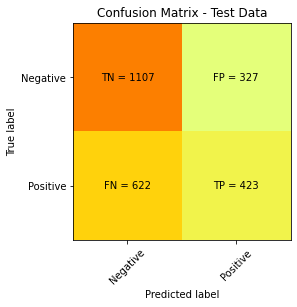

In [113]:
print_cm(cm)

### 6.1.3 Naive Bayes

In [114]:
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()
gauss_nb.fit(train_X_scale, train_y)
pred_y_gnb = gauss_nb.predict(test_X_scale)
metrics.accuracy_score(test_y, pred_y_gnb)

0.6095199677289229

In [115]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_gnb)

0.5635796413818877

In [116]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_gnb)

0.13704951423631384

In [117]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1434
           1       0.58      0.27      0.37      1045

    accuracy                           0.61      2479
   macro avg       0.60      0.56      0.54      2479
weighted avg       0.60      0.61      0.57      2479



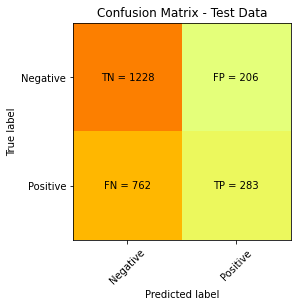

In [118]:
cm = metrics.confusion_matrix(test_y, pred_y_gnb)
print_cm(cm)

### 6.1.4 Decision Tree

In [119]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X_scale, train_y)
pred_y_dt = dt.predict(test_X_scale)
metrics.accuracy_score(test_y, pred_y_dt)

0.5611133521581283

In [120]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_dt)

0.5515912260682135

In [121]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_dt)

0.10286203148221318

In [122]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1434
           1       0.48      0.49      0.49      1045

    accuracy                           0.56      2479
   macro avg       0.55      0.55      0.55      2479
weighted avg       0.56      0.56      0.56      2479



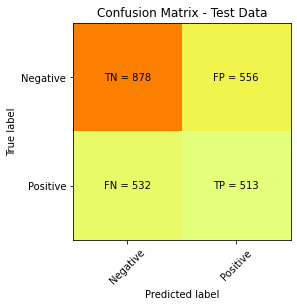

In [123]:
cm = metrics.confusion_matrix(test_y, pred_y_dt)
print_cm(cm)

### 6.1.5 Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_features=13, random_state=123)
rf.fit(train_X_scale,train_y)
pred_y_rf = rf.predict(test_X_scale)
metrics.accuracy_score(test_y, pred_y_rf)

0.581686163775716

In [125]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_rf)

0.5663883939594135

In [126]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_rf)

0.13404687564738738

In [127]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1434
           1       0.48      0.49      0.49      1045

    accuracy                           0.56      2479
   macro avg       0.55      0.55      0.55      2479
weighted avg       0.56      0.56      0.56      2479



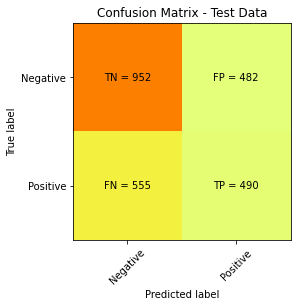

In [128]:
cm = metrics.confusion_matrix(test_y, pred_y_rf)
print_cm(cm)

### 6.1.6 SVM

In [129]:
from sklearn import svm
svc_linear = svm.SVC(kernel='linear', C=1.0)
svc_linear.fit(train_X_scale,train_y)
pred_y_svc = svc_linear.predict(test_X_scale)
metrics.accuracy_score(test_y, pred_y_svc)

0.6079064138765631

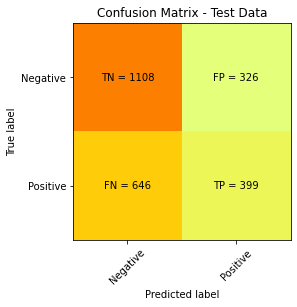

In [130]:
cm = metrics.confusion_matrix(test_y, pred_y_svc)
print_cm(cm)

### 6.1.7 Model Comparison

In [131]:
acc = [metrics.accuracy_score(test_y, pred_y_knn16),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_svc)]

pre = [metrics.accuracy_score(test_y, pred_y_knn16),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_svc)]

rec = [metrics.accuracy_score(test_y, pred_y_knn16),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_svc)]

f1  =[metrics.accuracy_score(test_y, pred_y_knn16),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_svc)]
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN (k=16)',
                      'Gaussian Naive Bayes',
                      'Decision Tree',
                      'RF without Hyperparameter Tunning',
                      'SVM without Hyperparameter Tunning'])

,Accuracy,Precision,Recall,F1 Score
k-NN (k=16),0.617184,0.617184,0.617184,0.617184
Gaussian Naive Bayes,0.609520,0.609520,0.609520,0.609520
Decision Tree,0.561113,0.561113,0.561113,0.561113
RF without Hyperparameter Tunning,0.581686,0.581686,0.581686,0.581686
SVM without Hyperparameter Tunning,0.607906,0.607906,0.607906,0.607906


## 6.2 What factors impact on customer satisfaction for a specific restaurant?

### 6.2.1Data normalization and partition

In [132]:
y = dat2['stars']
X = pd.concat([dat2,pd.get_dummies(dat2['RestaurantsPriceRange2'],prefix='PriceRange',drop_first=True) ], axis=1)
# Logistic regression needs a constant
X_logistic = X
X_logistic['Const'] = 1
X = X.drop(['stars','RestaurantsPriceRange2'], axis=1)

In [133]:
train_y,test_y,train_X,test_X = train_test_split(y, X,test_size=0.2,random_state=1)

### 6.2.2 Support Vector Machine(SVM) analysis 

In [134]:
svc_linear = svm.SVC(kernel='linear', C=1, class_weight='balanced')
svc_linear.fit(train_X,train_y)
pred_y1 = svc_linear.predict(test_X)
print(metrics.classification_report(test_y, pred_y1))

              precision    recall  f1-score   support

           0       0.39      0.78      0.52       800
           1       0.88      0.57      0.69      2312

    accuracy                           0.63      3112
   macro avg       0.63      0.68      0.61      3112
weighted avg       0.75      0.63      0.65      3112



#### 6.2.2.1 Tune Hyper-parameters(SVM)

In [135]:
svc_rbf = svm.SVC(kernel='rbf', C=1, class_weight='balanced')
svc_rbf.fit(train_X,train_y)
pred_y2 = svc_rbf.predict(test_X)
print(metrics.classification_report(test_y, pred_y2))

              precision    recall  f1-score   support

           0       0.42      0.82      0.55       800
           1       0.91      0.60      0.73      2312

    accuracy                           0.66      3112
   macro avg       0.66      0.71      0.64      3112
weighted avg       0.78      0.66      0.68      3112



* After tuning the kernel from linear to rbf, the model performs better. Precision, recall and accuracy increases.
* From recall= 0.6 We can see that only 60% of restaurants that actually have star rating >=3.5 have been correctly classified by the logistic regression model. From precision = 0.91, we know that 91% of restaurants that have been classified as high rating are actually high rating. 
* 66% of data can be predicted correctly.

* For restaurants with good service but not good enough star rating, they could try providing promotion or discount on Sunday, Monday or Tuesday, street parking and adjust price range, reservation service and better focus on dinner and lunch.

### 6.2.3 Ramdom Forest 

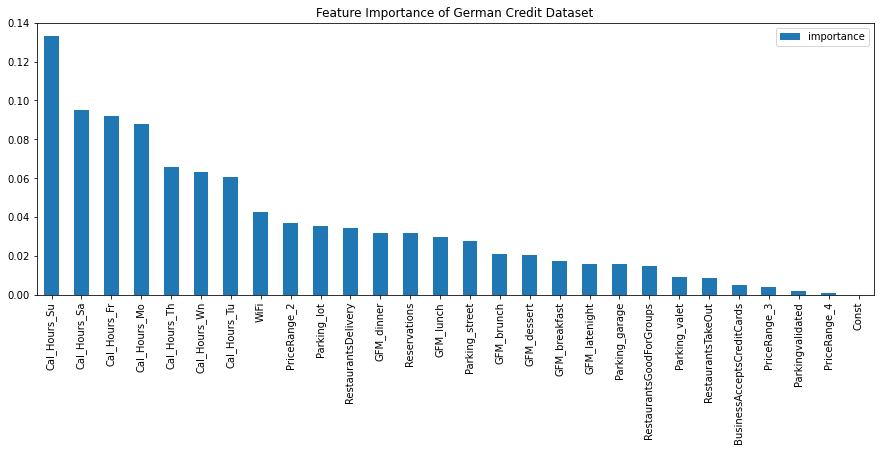

In [136]:
rf = RandomForestClassifier(random_state=123,class_weight='balanced')
rf.fit(train_X,train_y)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [137]:
pred_y_rf = rf.predict(test_X)

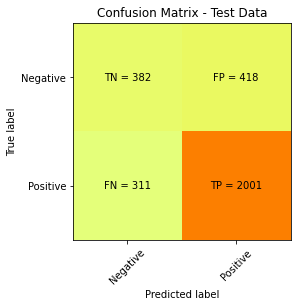

In [138]:
print_cm(metrics.confusion_matrix(test_y, pred_y_rf))

In [139]:
print(metrics.classification_report(test_y, pred_y_rf))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       800
           1       0.83      0.87      0.85      2312

    accuracy                           0.77      3112
   macro avg       0.69      0.67      0.68      3112
weighted avg       0.76      0.77      0.76      3112



#### 6.2.3.1 Tune Hyper-parameters(RF)

In [140]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[10,20,30,40,50],
              'max_features':[1,3,5,7,9,13,15],
              'random_state':[123]}
rf2 = RandomForestClassifier(class_weight='balanced')
grid_rf = GridSearchCV(rf2, parameters, scoring='accuracy', cv=5)
grid_rf.fit(train_X,train_y)
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

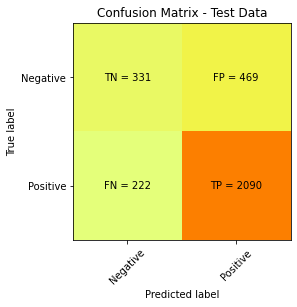

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       800
           1       0.82      0.90      0.86      2312

    accuracy                           0.78      3112
   macro avg       0.71      0.66      0.67      3112
weighted avg       0.76      0.78      0.76      3112



In [141]:
rf_final = RandomForestClassifier(n_estimators=50, 
                                   max_features=3, 
                                   criterion='gini',
                                   random_state=123)
rf_final.fit(train_X,train_y)
pred_y_rf_final = rf_final.predict(test_X)
print_cm(metrics.confusion_matrix(test_y, pred_y_rf_final))
print(metrics.classification_report(test_y, pred_y_rf_final))

After tuning the kernel from linear to rbf, n_estimators=50,max_features=3, and criterion='gini' turn out to be the best parameter. The accuracy increases but precision, recall of class=0 and f1-score decrease slightly.

* From recall of class 1 equals to 0.82, we can see that only 82% of restaurants that actually with star rating >=3.5 have been correctly classified by the Random Forests model. </br>
* From precision of class 1 equals to 0.90, we know that 90% of restaurants that have been classified as high rating are actually high rating. </br>
* 78% data can be predicted correctly.
* The recall of class 0 is relatively low with 0.41, which means only 41% of restaurants that actually have bad star rating have been correctly classified, and 59% of resaurants are predicted incorrectly as high star rating.

* In practice, industry category need to further figure out the critirions and difference like food taste, quality and freshness. that can help customers recognize the real good restaurants. In this case, good restaurants would be encouraged to keep working hard, and unsatisfactory restaurants would try to improve service. 

###  6.2.4 Model Comparison

In [142]:
acc = [metrics.accuracy_score(test_y, pred_y1),
       metrics.accuracy_score(test_y, pred_y2),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_rf_final)]

pre = [metrics.accuracy_score(test_y, pred_y1),
    metrics.precision_score(test_y, pred_y2),
       metrics.precision_score(test_y, pred_y_rf),
       metrics.precision_score(test_y, pred_y_rf_final)]

rec = [metrics.accuracy_score(test_y, pred_y1),
       metrics.recall_score(test_y, pred_y2),
       metrics.recall_score(test_y, pred_y_rf),
       metrics.recall_score(test_y, pred_y_rf_final)]

f1  = [metrics.accuracy_score(test_y, pred_y1),
       metrics.f1_score(test_y, pred_y2),
       metrics.f1_score(test_y, pred_y_rf),
       metrics.f1_score(test_y, pred_y_rf_final)]

In [143]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['SVM_linear','SVM_rbf','RF without Hyperparameter Tunning','RF with Hyperparameter Tunning'])

,Accuracy,Precision,Recall,F1 Score
SVM_linear,0.625321,0.625321,0.625321,0.625321
SVM_rbf,0.659704,0.906027,0.604671,0.725292
RF without Hyperparameter Tunning,0.765746,0.827201,0.865484,0.845910
RF with Hyperparameter Tunning,0.777956,0.816725,0.903979,0.858140


In comprehensive, random forests with Hyperparameter Tuning is the best model for this datase with F1 score high up to 86%. However, SVM_rbf performed with best precision, which means this model is able to most precisly recognize the high star rating restaurants.We need to choose model accroding performance as well as our objective. Our question is to figure out factors impacting on customer satisfaction(star rating). We need to analyze the features of the really good restaurants. Therefore, SVM_rbf better fits our goal.  

## 6.3 What is the most important characteristic of elite users?

### 6.3.1 Data Partition and Normalizing

In [144]:
y = dat3_refined['Elite_Level']
X = dat3_refined
X = X.drop(['Num_Elite','Elite_Level','user_id','name','elite','yelping_since','Review_Level_1'], axis=1)

In [145]:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [146]:
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.2,
                                                                 random_state=1)

In [147]:
train_X_scale,test_X_scale = model_selection.train_test_split(X_scale,
                                                              test_size=0.2,
                                                              random_state=1)

### 6.3.2 K-Nearest Neighbors

In [148]:
from sklearn import neighbors
from sklearn import metrics
from math import sqrt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [149]:
k = np.arange(50) + 1
para_knn = {'n_neighbors':k}
para_knn

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [150]:
knn = neighbors.KNeighborsClassifier()
grid_knn = model_selection.GridSearchCV(knn, para_knn)

In [151]:
grid_knn.fit(train_X_scale,train_y.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [152]:
grid_knn.best_params_

{'n_neighbors': 48}

Since the grid_knn is tuned by using the optimal hyper parameter, we can use the grid_knn as the best k-NN model. We don't need to manually train a knn model with k = 48.

In [153]:
# Predict on test set
pred_y_knn = grid_knn.predict(test_X_scale)

In [154]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5424 1693]
 [1639 5520]]


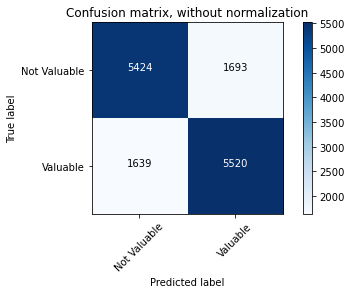

In [155]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y, pred_y_knn)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Valuable','Valuable'],
                      title='Confusion matrix, without normalization')


In [156]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_knn)

0.766601288876436

In [157]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_knn)

0.7652849022598087

In [158]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y, pred_y_knn)

0.7710574102528286

In [159]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_knn)

0.7681603117172279

In [160]:
# Print classification report
target_names = ['Not Useful', 'Useful']
print(metrics.classification_report(test_y, pred_y_knn, target_names=target_names))

              precision    recall  f1-score   support

  Not Useful       0.77      0.76      0.77      7117
      Useful       0.77      0.77      0.77      7159

    accuracy                           0.77     14276
   macro avg       0.77      0.77      0.77     14276
weighted avg       0.77      0.77      0.77     14276



### 6.3.3 Naive Bayes

In [161]:
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [162]:
gauss_nb.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Confusion matrix, without normalization
[[6975  142]
 [5623 1536]]


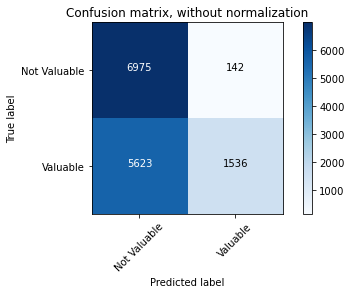

In [163]:
pred_y_gnb = gauss_nb.predict(test_X)
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y, pred_y_gnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Valuable','Valuable'],
                      title='Confusion matrix, without normalization')

In [164]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_gnb)

0.5961753992715046

In [165]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_gnb)

0.5973014391998461

In [166]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_gnb)

0.19416424769156226

In [167]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71      7117
           1       0.92      0.21      0.35      7159

    accuracy                           0.60     14276
   macro avg       0.73      0.60      0.53     14276
weighted avg       0.74      0.60      0.53     14276



In [168]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

In [169]:
bernou_nb.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Confusion matrix, without normalization
[[4613 2504]
 [1166 5993]]


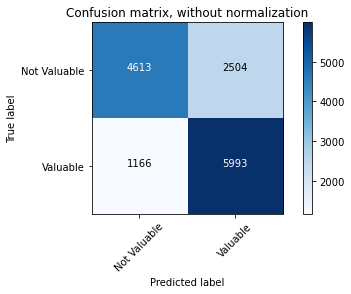

In [170]:
pred_y_bnb = bernou_nb.predict(test_X)
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y, pred_y_bnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Valuable','Valuable'],
                      title='Confusion matrix, without normalization')

In [171]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_bnb)

0.7429251891286075

In [172]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_bnb)

0.7426472263733561

In [173]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_bnb)

0.485562228331069

In [174]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      7117
           1       0.71      0.84      0.77      7159

    accuracy                           0.74     14276
   macro avg       0.75      0.74      0.74     14276
weighted avg       0.75      0.74      0.74     14276



### 6.3.4 Decision Tree

In [175]:
para_dt = {'min_samples_split':np.arange(200,501)}
dt = tree.DecisionTreeClassifier()
grid_dt = model_selection.GridSearchCV(dt, para_dt)
grid_dt.fit(train_X,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
       434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
       447, 448, 449, 450,

In [176]:
# Show best parameters
grid_dt.best_params_

{'min_samples_split': 500}

In [177]:
# Predict on test set
pred_y_dt = grid_dt.predict(test_X)

Confusion matrix, without normalization
[[5562 1555]
 [1512 5647]]


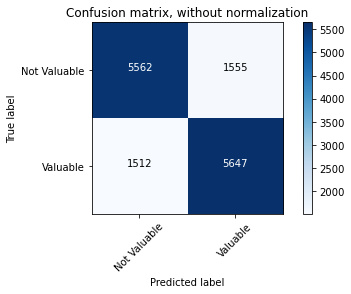

In [178]:
# Compute confusion matrix
cnf_matrix_dt = confusion_matrix(test_y, pred_y_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes=['Not Valuable','Valuable'],
                      title='Confusion matrix, without normalization')

In [179]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_dt)

0.7851639114597927

In [180]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_dt)

0.7840877534018328

In [181]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_dt)

0.7864354849940811

In [182]:
target_names = ['Not useful', 'useful']
print(metrics.classification_report(test_y, pred_y_dt, target_names=target_names))

              precision    recall  f1-score   support

  Not useful       0.79      0.78      0.78      7117
      useful       0.78      0.79      0.79      7159

    accuracy                           0.79     14276
   macro avg       0.79      0.79      0.79     14276
weighted avg       0.79      0.79      0.79     14276



### 6.3.5 Compare Predictive Models

In [183]:
para = [grid_knn.best_params_,' ',' ',grid_dt.best_params_]

acc = [metrics.accuracy_score(test_y, pred_y_knn),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_dt)]

pre = [metrics.precision_score(test_y, pred_y_knn),
       metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb),
       metrics.precision_score(test_y, pred_y_dt)]

rec = [metrics.recall_score(test_y, pred_y_knn),
       metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb),
       metrics.recall_score(test_y, pred_y_dt)]

f1  = [metrics.f1_score(test_y, pred_y_knn),
       metrics.f1_score(test_y, pred_y_gnb), 
       metrics.f1_score(test_y, pred_y_bnb),
       metrics.f1_score(test_y, pred_y_dt)]

In [184]:
pd.DataFrame({'Parameters':para,
              'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN','Gaussian Naive Bayes','Bernoulli Naive Bayes','Decision Tree'])

,Parameters,Accuracy,Precision,Recall,F1 Score
k-NN,{'n_neighbors': 48},0.766601,0.765285,0.771057,0.768160
Gaussian Naive Bayes,,0.596175,0.915375,0.214555,0.347629
Bernoulli Naive Bayes,,0.742925,0.705308,0.837128,0.765585
Decision Tree,{'min_samples_split': 500},0.785164,0.784088,0.788797,0.786435


Decision Tree has the highest accuracy and F1 score, while bernoulli naive bayes has the highest Recall and gaussian naive bayes has the highest precision.

# 7. Summary

## 7.1 	What is the relationship between Business location and local catering industries?

For this question, we can define the local catering industries by the star of the restaurant.  From the analysis, we can see that most restaurants have 3.5 to 4.0 stars, and the majority number of reviews is lower than 500. For the restaurant categories, Mexican, Italian, and Chinese are the top three popular. 

From the chart, we can see that the relationship between the stars and other factors that quite different. The most significant part is the latitude, which has a coefficient of 0.0196. That means that the high latitude will result in the high stars.  What is more, with the increasing of the stars, all category countries have a negative relationship, which means that the high star restaurant has strictly standard.

We get useful information by using the bar chart and logical regression analysis. We tried to find the best model and compared K-Nearest Neighbors, Gaussian Naive Bayes, Decision Tree, Random Forest, and SVM.

We found that KNN is the best model for this dataset with an F1 score to 61% and 61,7% accuracy, which means this model can recognize the high star rating restaurants most precisely. What is more, the Naïve Bayes and SVM without Hyperparameter Tuning have the same performance with similar accuracy. Therefore, KNN better fits our goal.

## 7.2 What factors impact on customer satisfaction for a specific restaurant?

From the analysis result, Business parking, restaurant reservation, restaurant good for groups, business accepts credit cards, take out service have a positive effect on customer satisfaction. If the restaurant can provide this, it will improve customer satisfaction. However, a parking garage, parking validated, parking valet, or near the street, provide delivery and have free WiFi not affect customer satisfaction.

We get useful information by using the bar chart and logical regression analysis. We tried to find the best model and compared SVM and RF. 

From logistic regression results, predictors except Cal_Hours_Tu are statistically significant with P-value <0.5.

1) All the parking conditions are positively related to star rating, but parking street is the strongest. 

2) All the price ranges are positively related to star rating, and range 3 and 4 has stronger relationship, which means restaurants with high rating tend to have price range between middle-high to high. 

3) Reservation and delivery are positively related to star rating.

4) Restaurants catering for dinner have relatively positive relationship with star rating, while these catering for breakfast have negatively relationship. 

5) Restaurants with longer business hours on Sunday and Monday tend to have lower star rating, and higher star rating on long business hours on Thursday.

Therefore, we suggest that restaurants to provide parking conditions, and near the parking street is mostly recommended. The restaurant should avoid viciously price reduction, because low price can be related to poor food quality, taste and unsatisfactory service. Most customer accept the moderate price because these restaurants not only have high quality food, but also charge reasonable fee. So, a restaurant charges a reasonable fee is very important. Restaurants should try to include dinner in their main business categories and provide promotion or discount on Sunday, Monday or Tuesday. It is likely to improve customer reviews. We also suggest the restaurant also provide conservation service to attract customer.


We found that random forests with Hyperparameter Tuning are the best model for this dataset with an F1 score high up to 86%. However, SVM_rbf performed with the best precision, which means this model can recognize the high star rating restaurants most precisely. We need to choose the model according to performance as well as our objective. Our question is to figure out factors impacting on customer satisfaction (star rating). We need to analyze the features of delicious restaurants. Therefore, SVM_rbf better fits our goal.

## 7.3 What is the most important characteristic of elite users?

For this question, we can find that most elite users have less than two years, and the number of reviews is also less than 2000 reviews. For elite users, the majorite factor is review count, useful, review level. For review level, the most review is on level 1 and level 2, which means that the users prefer to make a simple review.


Based on the regression analysis, we find that:
- Increase the number of reviews by 1%, the number elite years would increase by 0.0027% on average.
- Increase the number of useful comments by 1%, the number elite years would increase by 0.001% on average.
- Increase the number of funny comments by 1%, the number elite years would increase by 0.0001% on average.
- Increase the number of cool comments by 1%, the number elite year would decrease by 0.0014% on average.
- Increase the number of average stars by 1%, the number elite year would decrease by 0.0672% on average.
- Increase the number of friends by 1%, the number elite year would increase by 0.0002% on average.
- Increase the total compliments by 1%, the number elite year would decrease by 0.0003% on average.

From the total of the type of compliment, the coefficient of compliment_more is the highest. It means the elite are encouraged to write more reviews. 

We found that the coefficient of review_level_3 is the highest estimated as 4.4549 based on our OLS model analysis. It means that when a user reviews are at Level 3, he/she has the highest elite year. This indicates that elites need to have more comments on yelp, but not more is better.


We compared four models including KNN, Gaussian Naive Bayes，Bernoulli Naive Bayes and decision tree.

We found that Decision Tree has the highest accuracy and F1 score, while Bernoulli naive Bayes has the highest Recall and Gaussian naive Bayes has the highest precision.

Based on the data we predict, we found that the number of user reviews will affect the number of elite years. Therefore, we suggest the restaurant try to encourage customers to use yelp and give positive comments. For example, every time you go to a restaurant and use yelp reviews, you can get points. Accumulate points based on the amount of each consumption. Then prepare the corresponding points to exchange for rewards. The reward can be a coupon. The most important thing is that a restaurant with high-quality food and good service can attract customers to give positive comments.